<a href="https://colab.research.google.com/github/Khalishana/finalcode_kasdad/blob/main/FinalCode_CSGE603130.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Health Admission Analysis and Prediction**

👨‍💻**Anggota kelompok**
* Ayu Siti Nasya Ningrum (2206025426)
* Khalisha Hana Aida Putri (2206081484)
* Ratu Nadya Anjania (2206029752)
* Reyhan Wiyasa Puspanegara (2206081925)

📚 **References**

# Import Library & Dataset

## 🗄️ Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import seaborn as sb

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from xgboost import XGBRFClassifier

## 🗂️ Dataset

In [ ]:
df = pd.read_csv('admission.csv')

# Description

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12551 entries, 0 to 12550
Data columns (total 56 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   SNO                              12551 non-null  int64 
 1   MRD No.                          12551 non-null  object
 2   D.O.A                            12551 non-null  object
 3   D.O.D                            12551 non-null  object
 4   AGE                              12551 non-null  int64 
 5   GENDER                           12551 non-null  object
 6   RURAL                            12551 non-null  object
 7   TYPE OF ADMISSION-EMERGENCY/OPD  12551 non-null  object
 8   month year                       12551 non-null  object
 9   DURATION OF STAY                 12551 non-null  int64 
 10  duration of intensive unit stay  12551 non-null  int64 
 11  SMOKING                          12551 non-null  int64 
 12  ALCOHOL                         

# Preprocessing

1. Verify data types
2. Handle null and duplicates
3. Handle outlier
4. Feature engineering
5. Encoding
6. Transform
7. Cek and handle imbalance (untuk klasifikasi)
8. Train
9. Evaluate

In [ ]:
df = df.drop(columns=['SNO', 'MRD No.', 'D.O.A', 'D.O.D', 'month year'])

In [ ]:
df_check = []
for i in df.columns :
  unique_data = df[i].nunique()
  missing_value = df[i].isnull().sum()
  duplicated_data = df.duplicated().sum()

  df_check.append([i, unique_data, missing_value, duplicated_data])

df_info = pd.DataFrame(df_check)
df_info.columns = ['data', 'unique_data', 'missing_value', 'duplicated_data']
df_info

,data,unique_data,missing_value,duplicated_data
0,AGE,96,0,661
1,GENDER,2,0,661
2,RURAL,2,0,661
3,TYPE OF ADMISSION-EMERGENCY/OPD,2,0,661
4,DURATION OF STAY,51,0,661
5,duration of intensive unit stay,43,0,661
6,SMOKING,2,0,661
7,ALCOHOL,2,0,661
8,DM,2,0,661
9,HTN,2,0,661


In [ ]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in the '{column}' column:")
    print(unique_values)
    print()

Unique values in the 'AGE' column:
[ 63  47  59  62  55  82  56  41  60  53  76  72  39  86  54  45  58  29
  70  48  32  80  65  64  50  68  61  84  42  49  81  73  85  52  87  30
  75  40  77  36  67  71  38  79  74  78  57  44  66  46  51  25  26  27
  19   5  89  69  34  88  83  43  11  10  13  35  28  92  20  31  37  12
  15   6  24  17  23  22  96   4  99  16  95  90  21  14  33  98  97  94
   7  91  18 110  93   9]

Unique values in the 'GENDER' column:
['F' 'M']

Unique values in the 'RURAL' column:
['U' 'R']

Unique values in the 'TYPE OF ADMISSION-EMERGENCY/OPD' column:
['O' 'E']

Unique values in the 'DURATION OF STAY' column:
[ 7  5  2  9  8  3  6 15  4 12 14 36 13 16 10  1 11 18 24 17 19 37 48 23
 22 41 28 38 29 39 20 26 32 25 21 42 27 31 33 47 35 44 52 34 49 30 58 50
 45 46 53]

Unique values in the 'duration of intensive unit stay' column:
[ 4  0  1  5  3  2  7  6  8 13 10 12  9 15 11 18 37 31 20 14 22 19 25 17
 16 26 32 21 24 23 40 36 30 34 29 35 28 27 39 48 58 41 45]



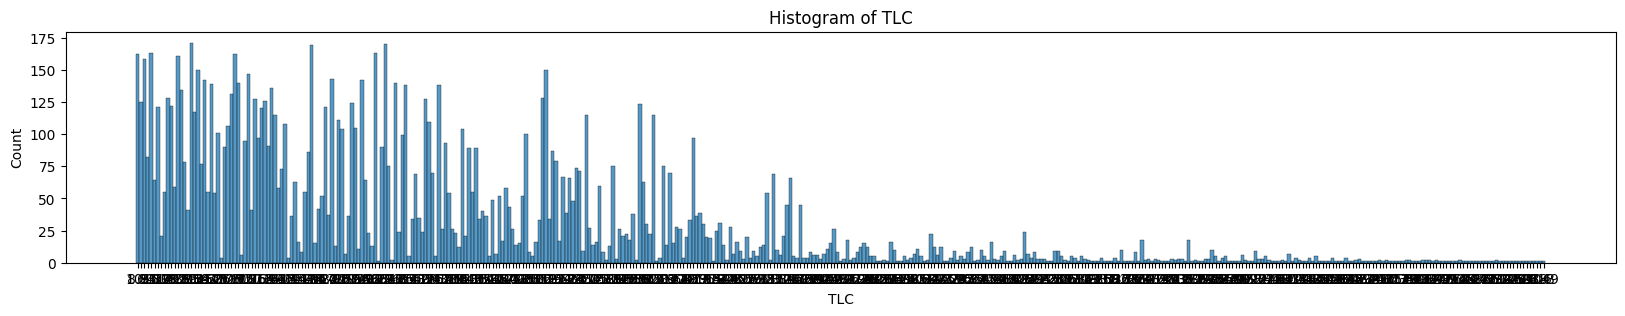

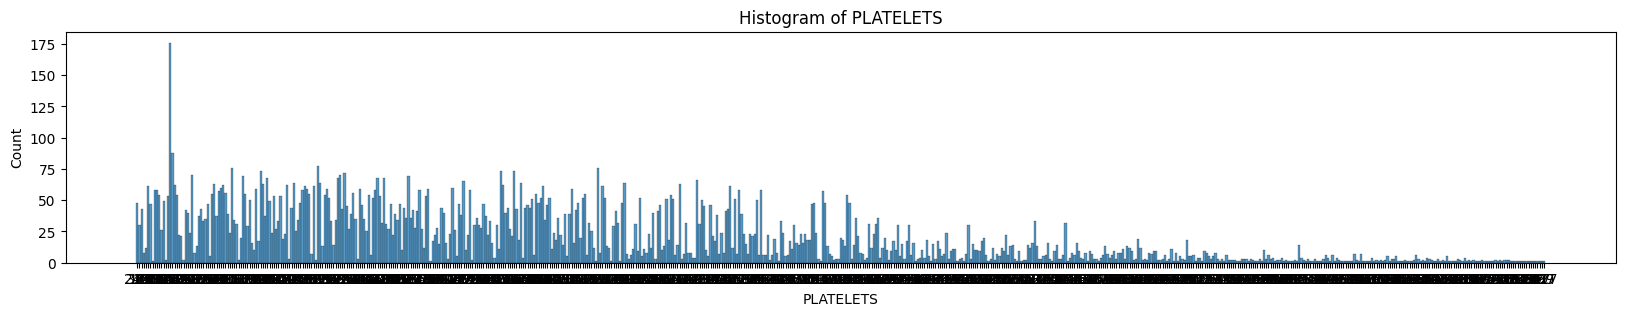

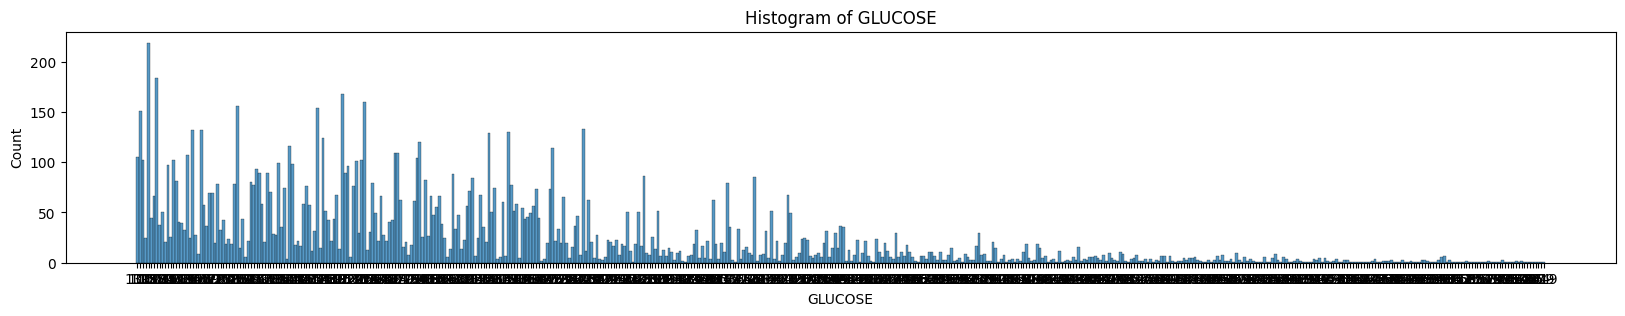

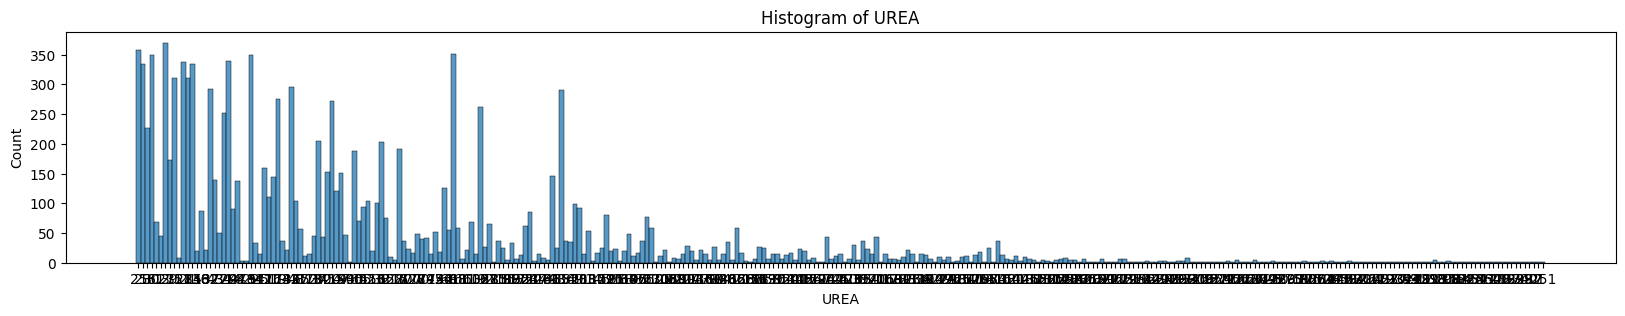

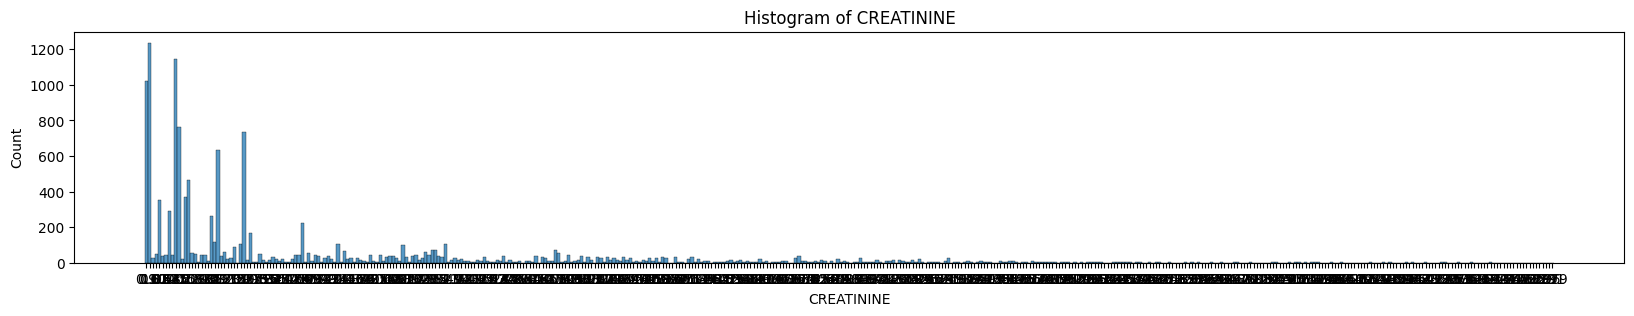

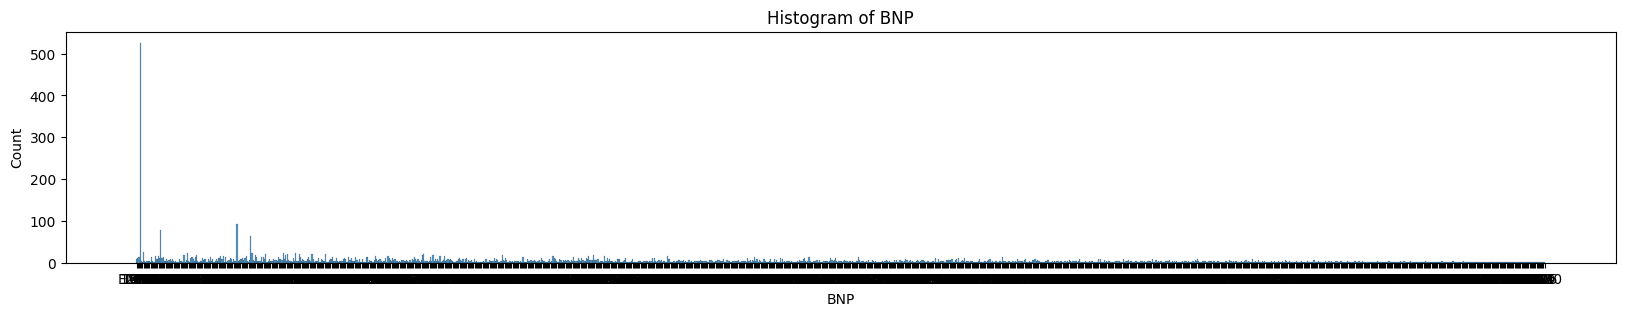

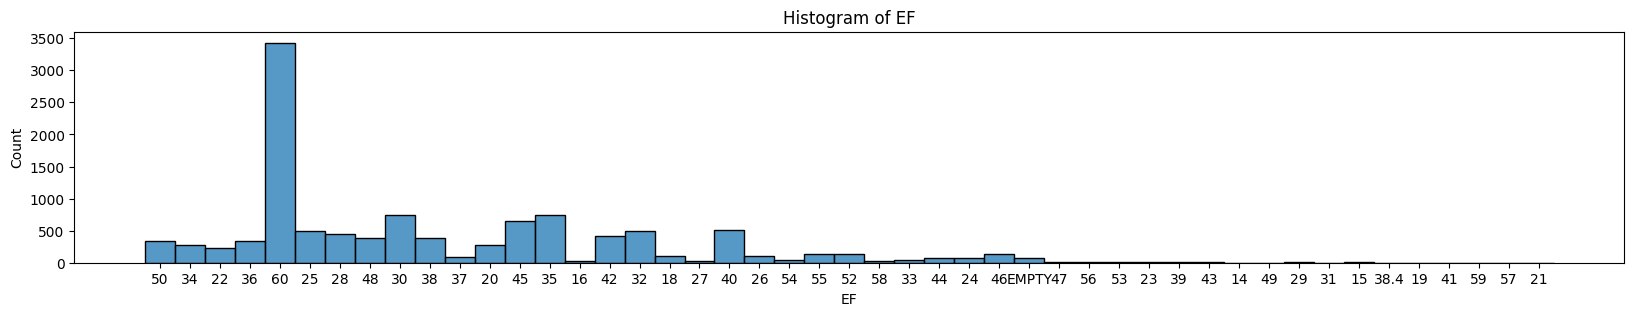

In [ ]:
columns_to_fill = ['TLC', 'PLATELETS', 'GLUCOSE', 'UREA', 'CREATININE', 'BNP', 'EF']

# Plot histograms for the chosen columns
for col in columns_to_fill:
  plt.figure(figsize=(20, 3))
  sns.histplot(df[col])
  plt.title(f'Histogram of {col}')
  plt.show()

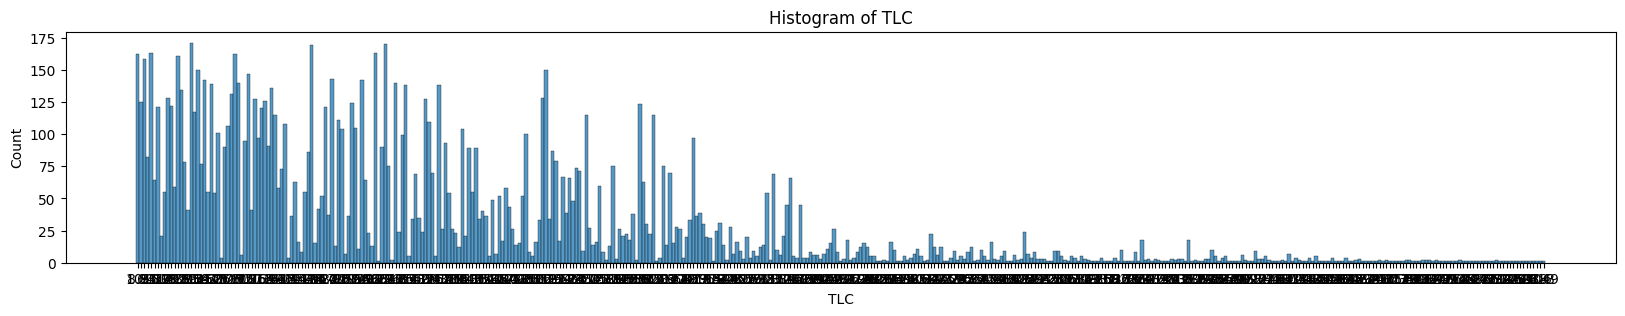

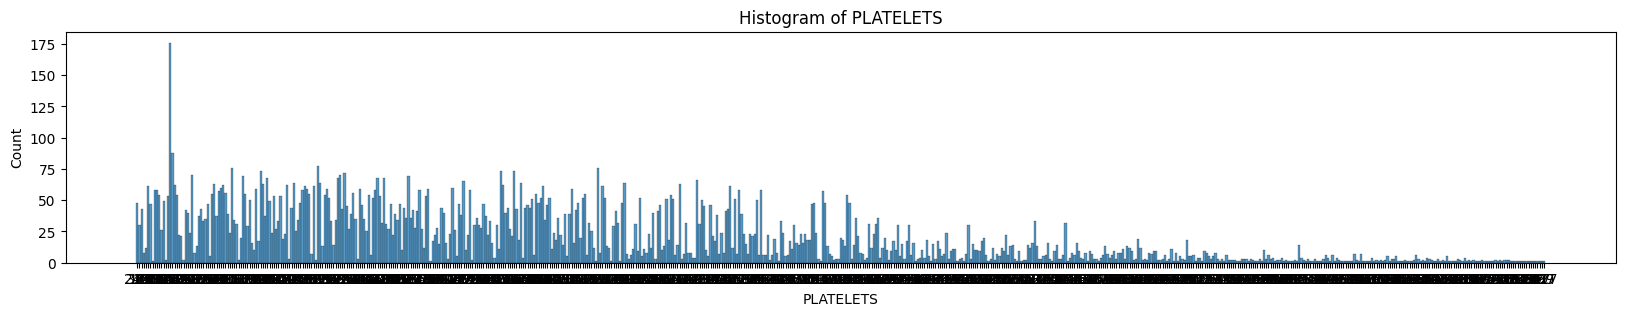

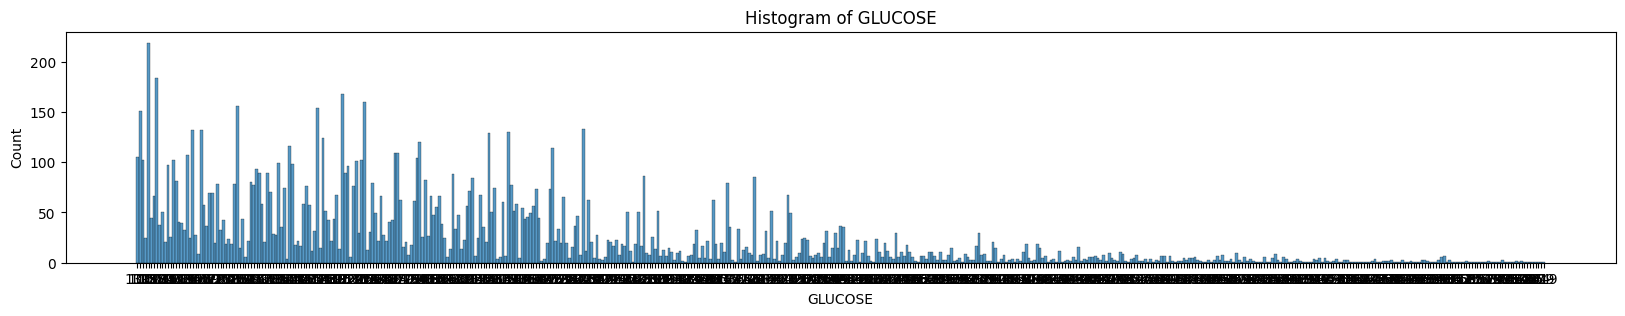

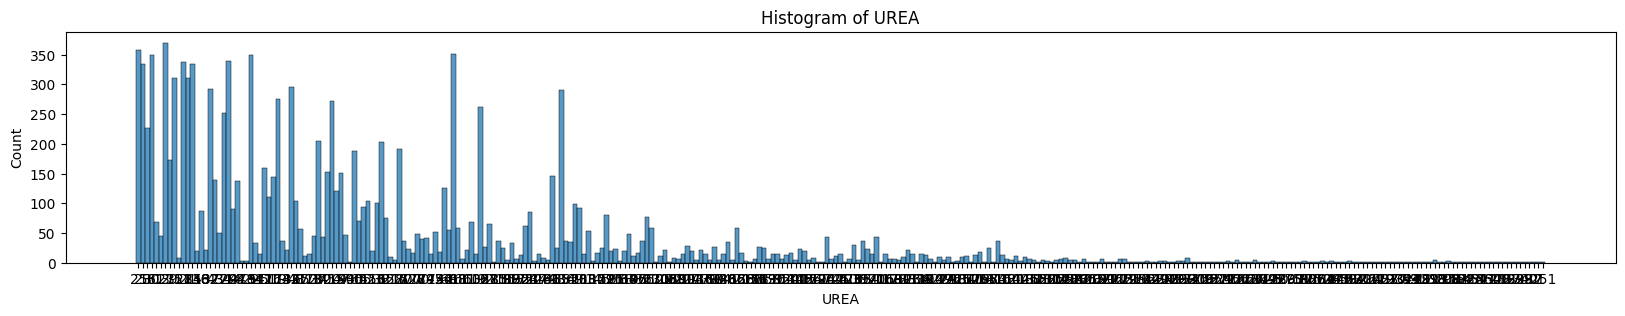

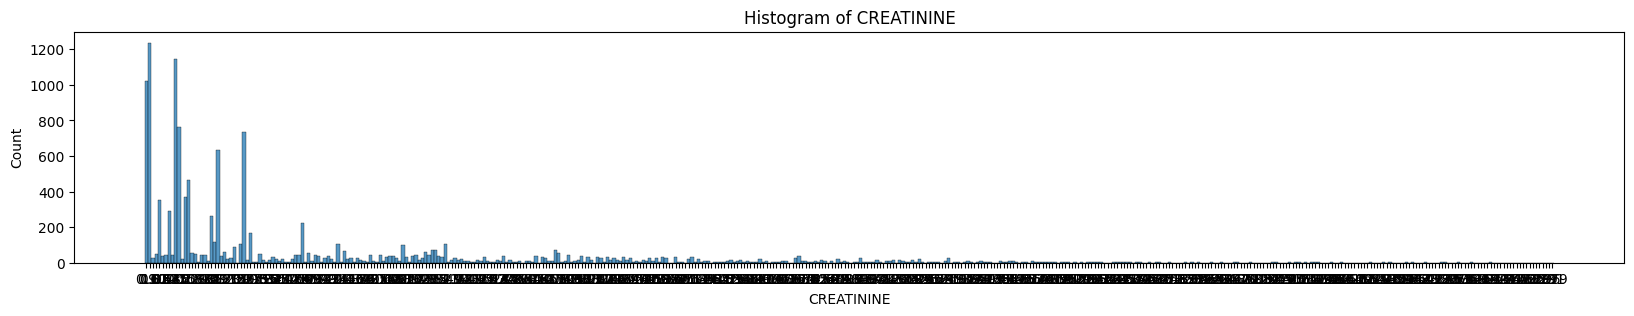

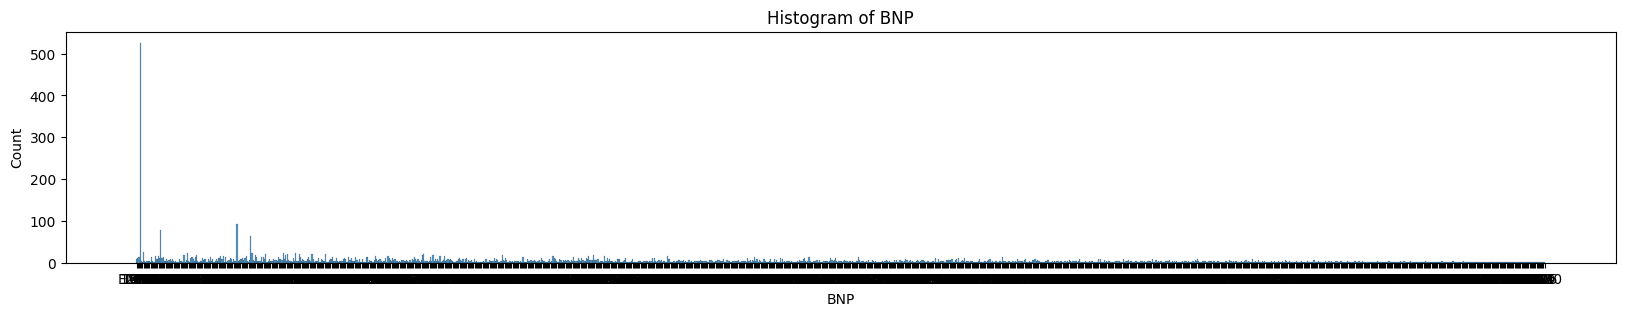

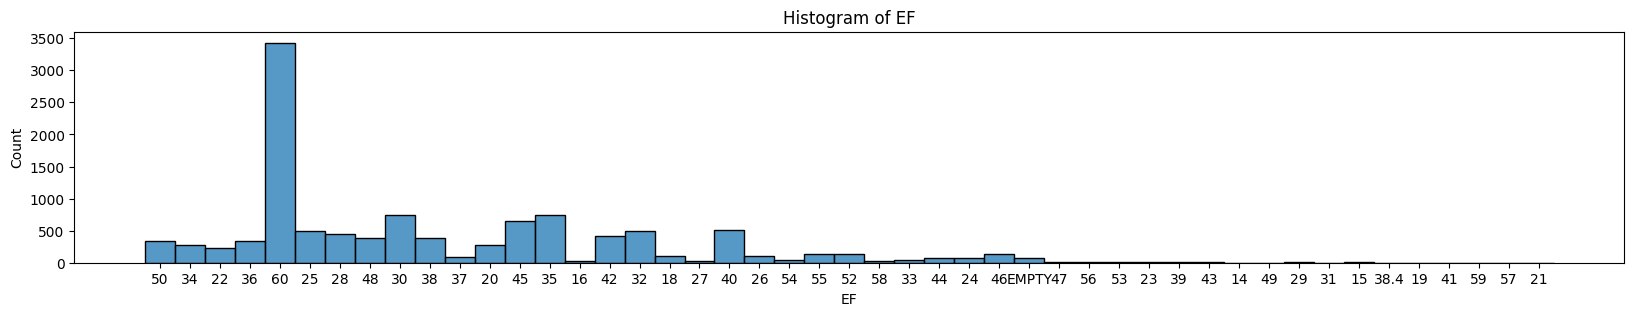

In [ ]:
columns_to_fill_2 = ['HB', 'CHEST INFECTION']

# Plot histograms for the chosen columns
for col in columns_to_fill:
  plt.figure(figsize=(20, 3))
  sns.histplot(df[col])
  plt.title(f'Histogram of {col}')
  plt.show()

## 📍Change data type

In [ ]:
odd_columns = ['TLC', 'PLATELETS', 'GLUCOSE', 'UREA', 'CREATININE', 'BNP', 'EF', 'CHEST INFECTION', 'HB']
df[odd_columns] = df[odd_columns].apply(pd.to_numeric, errors = 'coerce')

## 📍Handle duplicated data

In [ ]:
df = df.drop_duplicates()
df.head()

,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,DURATION OF STAY,duration of intensive unit stay,SMOKING,ALCOHOL,DM,HTN,...,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION,OUTCOME,HB
0,63,F,U,O,7,4,0,0,1,1,...,0,0,0,0,0,0,0,0.0,DISCHARGE,10.9
1,47,M,U,O,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,DISCHARGE,15.0
2,59,M,U,E,2,1,0,0,0,1,...,0,0,0,0,0,0,0,0.0,DISCHARGE,13.7
3,62,M,R,E,9,5,0,0,0,1,...,0,0,0,0,0,0,0,0.0,DISCHARGE,13.3
4,55,F,U,E,5,3,0,0,0,0,...,0,0,0,0,0,0,0,0.0,DISCHARGE,11.8


## 📍Handle missing values

In [ ]:
for column in columns_to_fill:
    median_value = df[column].median()
    df[column].fillna(median_value, inplace=True)

mean_value = df['HB'].mean()
df['HB'].fillna(mean_value, inplace=True)

df['CHEST INFECTION'].fillna(0, inplace=True)
df.isnull().sum()

<ipython-input-10-44b6fe652d40>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].fillna(median_value, inplace=True)
<ipython-input-10-44b6fe652d40>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].fillna(median_value, inplace=True)
<ipython-input-10-44b6fe652d40>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].fillna(median_value, inplace=True)
<ipython-input-10-44b6fe652d40>:3: SettingWithCopyWarning:

AGE                                0
GENDER                             0
RURAL                              0
TYPE OF ADMISSION-EMERGENCY/OPD    0
DURATION OF STAY                   0
duration of intensive unit stay    0
SMOKING                            0
ALCOHOL                            0
DM                                 0
HTN                                0
CAD                                0
PRIOR CMP                          0
CKD                                0
TLC                                0
PLATELETS                          0
GLUCOSE                            0
UREA                               0
CREATININE                         0
BNP                                0
RAISED CARDIAC ENZYMES             0
EF                                 0
SEVERE ANAEMIA                     0
ANAEMIA                            0
STABLE ANGINA                      0
ACS                                0
STEMI                              0
ATYPICAL CHEST PAIN                0
H

## 📍Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['GENDER'] = label_encoder.fit_transform(df['GENDER'])
df['RURAL'] = label_encoder.fit_transform(df['RURAL'])
df['TYPE OF ADMISSION-EMERGENCY/OPD'] = label_encoder.fit_transform(df['TYPE OF ADMISSION-EMERGENCY/OPD'])
df['OUTCOME'] = label_encoder.fit_transform(df['OUTCOME'])

<ipython-input-11-699b0105b2db>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GENDER'] = label_encoder.fit_transform(df['GENDER'])
<ipython-input-11-699b0105b2db>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RURAL'] = label_encoder.fit_transform(df['RURAL'])
<ipython-input-11-699b0105b2db>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

## 📍Handling outliers

Penanganan outlier tidak dilakukan karena berdasarkan riset yang diperoleh terkait dengan dataset `Health Admission`, outlier dapat terjadi secara natural dan bukan merupakan data yang dapat mengganggu analisis atau model. Justru, data-data yang merupakan outlier inilah yang akan menjadi *insight* untuk mengetahui pola dari suatu data

# Exploratory Data Analysis

## 📍Bulan dengan jumlah pasien terbanyak di rumah sakit

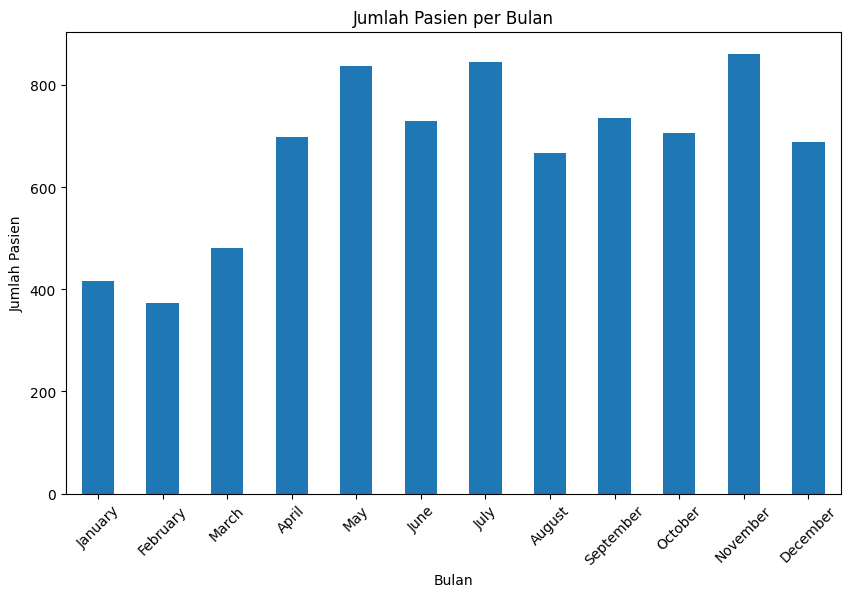

In [ ]:
import calendar

# Ubah kolom 'D.O.A' menjadi tipe data datetime dan abaikan nilai NaN dengan 'coerce'
df['D.O.A'] = pd.to_datetime(df['D.O.A'], errors='coerce')
df['month'] = df['D.O.A'].dt.month

# Hitung jumlah pasien untuk setiap bulan
monthly_patient_count = df.groupby('month').size()

# Ubah angka bulan menjadi nama bulan
monthly_patient_count.index = monthly_patient_count.index.map(lambda x: calendar.month_name[int(x)])

# Tentukan bulan dengan jumlah pasien terbanyak
bulan_terbanyak = monthly_patient_count.idxmax()
jumlah_pasien_terbanyak = monthly_patient_count.max()

monthly_patient_count.plot(kind='bar', figsize=(10, 6))
plt.title('Jumlah Pasien per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pasien')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Menampilkan bulan dengan jumlah pasien terbanyak
print("Bulan dengan jumlah pasien terbanyak adalah: " + bulan_terbanyak)

Bulan dengan jumlah pasien terbanyak adalah: November


## 📍Karakteristik pasien yang menderita *heart failure*

In [ ]:
# Mengubah tipe data Object menjadi numerik
df['GLUCOSE'] = df['GLUCOSE'].apply(pd.to_numeric, errors='coerce')

# Filter data pasien dengan heart failure
hf_patient = df[df['HEART FAILURE'] == 1]
no_hf_patient = df[df['HEART FAILURE'] == 0]

# Ringkasan Statistik Masing-Masing Fitur

# Fitur Demografis

print("Statistik Data Fitur Demografis Pasien - Grup Heart Failure:\n")
print(hf_patient['AGE'].describe())
print()
print(hf_patient['GLUCOSE'].describe())

print("\nStatistik Data Fitur Demografis Pasien - Grup Tanpa Heart Failure:\n")
print(no_hf_patient['AGE'].describe())
print()
print(no_hf_patient['GLUCOSE'].describe())

# Fitur kategorikal

print("\nJumlah nilai untuk Fitur Kategorikal - Grup Heart Failure:\n")
print(hf_patient['GENDER'].value_counts())
print(hf_patient['RURAL'].value_counts())
print(hf_patient['SMOKING '].value_counts())
print(hf_patient['ALCOHOL'].value_counts())
print()

print("\nJumlah nilai untuk Fitur Kategorikal - Grup Tanpa Heart Failure:\n")
print(no_hf_patient['GENDER'].value_counts())
print(no_hf_patient['RURAL'].value_counts())
print(no_hf_patient['SMOKING '].value_counts())
print(no_hf_patient['ALCOHOL'].value_counts())

Statistik Data Fitur Demografis Pasien - Grup Heart Failure:

count    3665.000000
mean       64.639291
std        12.508634
min        14.000000
25%        57.000000
50%        65.000000
75%        73.000000
max       110.000000
Name: AGE, dtype: float64

count    3665.000000
mean      175.694379
std        91.830961
min        17.000000
25%       114.000000
50%       144.000000
75%       214.000000
max       726.000000
Name: GLUCOSE, dtype: float64

Statistik Data Fitur Demografis Pasien - Grup Tanpa Heart Failure:

count    8886.000000
mean       60.067297
std        13.478434
min         4.000000
25%        52.000000
50%        61.000000
75%        70.000000
max        99.000000
Name: AGE, dtype: float64

count    8886.000000
mean      154.578697
std        76.378926
min         1.200000
25%       104.000000
50%       134.000000
75%       182.000000
max       888.000000
Name: GLUCOSE, dtype: float64

Jumlah nilai untuk Fitur Kategorikal - Grup Heart Failure:

GENDER
1    2215
0    

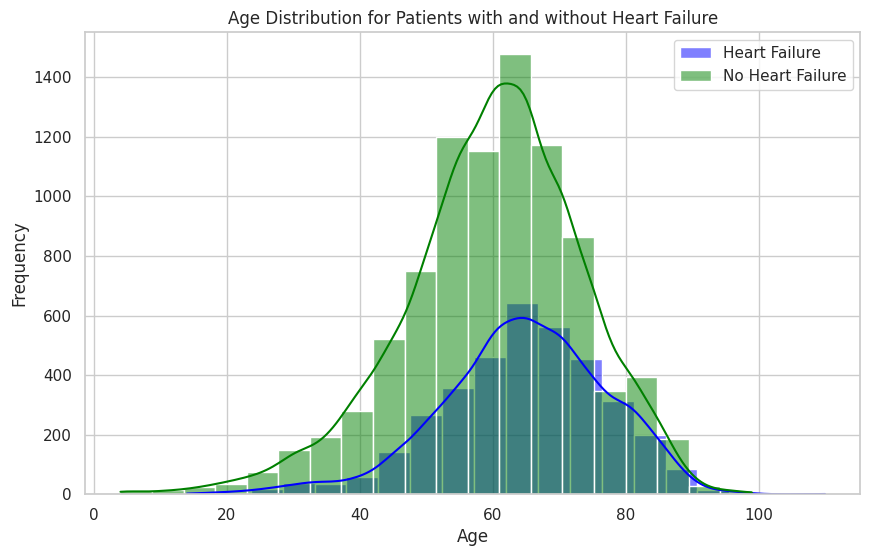

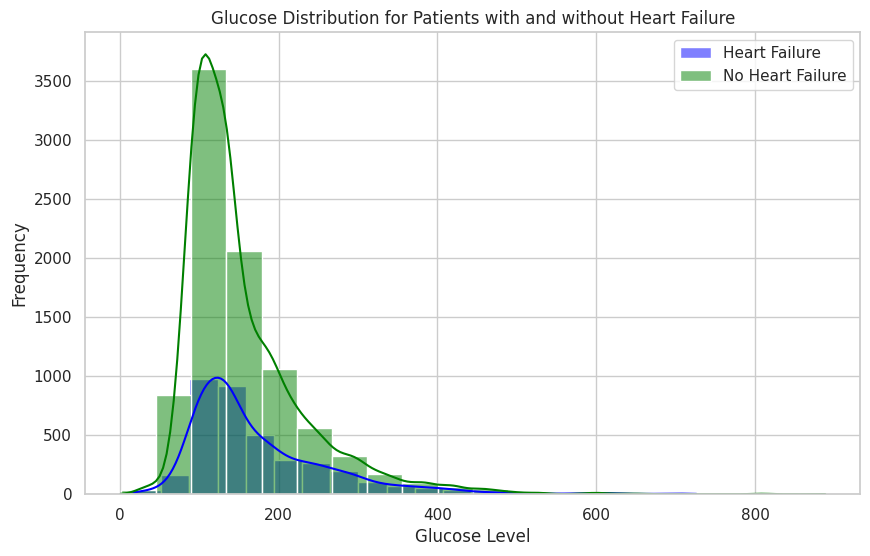

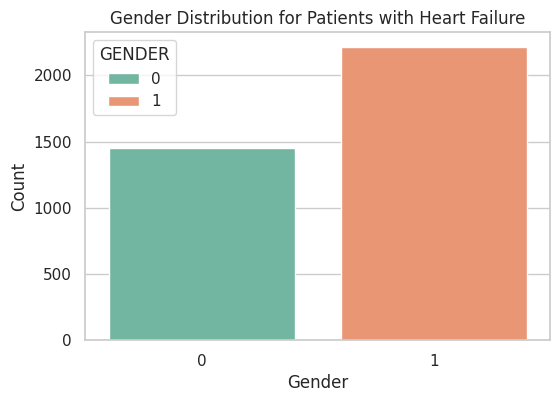

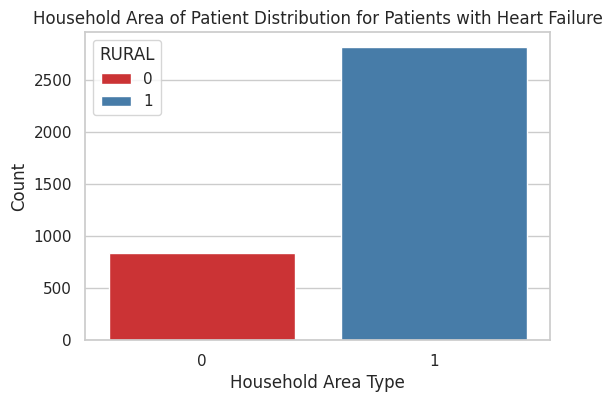

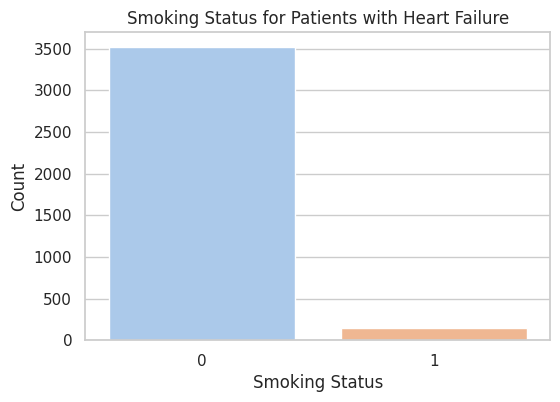

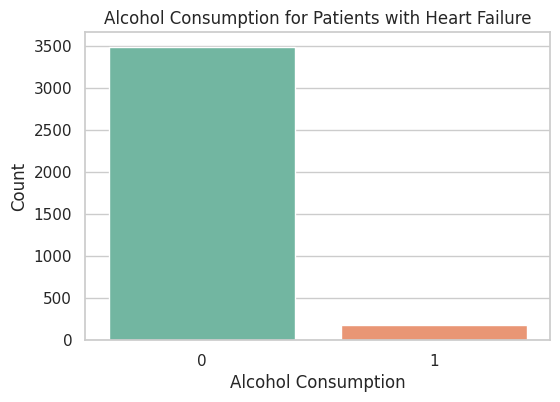

In [ ]:
sns.set(style="whitegrid")

# Visualisasi Distribusi Umur
plt.figure(figsize=(10, 6))
sns.histplot(hf_patient['AGE'], bins=20, kde=True, color='blue', label='Heart Failure')
sns.histplot(no_hf_patient['AGE'], bins=20, kde=True, color='green', label='No Heart Failure')
plt.title('Age Distribution for Patients with and without Heart Failure')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()
print()

# Visualisasi Distribusi Glukosa
plt.figure(figsize=(10, 6))
sns.histplot(hf_patient['GLUCOSE'].dropna(), bins=20, kde=True, color='blue', label='Heart Failure')
sns.histplot(no_hf_patient['GLUCOSE'].dropna(), bins=20, kde=True, color='green', label='No Heart Failure')
plt.title('Glucose Distribution for Patients with and without Heart Failure')
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')
plt.legend()
plt.show()
print()

# Visualisasi Distribusi Gender untuk Pasien dengan Heart Failure
plt.figure(figsize=(6, 4))
sns.countplot(x='GENDER', data=hf_patient, palette='Set2', hue='GENDER')
plt.title('Gender Distribution for Patients with Heart Failure')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()
print()

# Visualisasi Household Area dari Pasien untuk Pasien dengan Heart Failure
plt.figure(figsize=(6, 4))
sns.countplot(x='RURAL', data=hf_patient, palette='Set1', hue='RURAL')
plt.title('Household Area of Patient Distribution for Patients with Heart Failure')
plt.xlabel('Household Area Type')
plt.ylabel('Count')
plt.show()
print()

# Visualisasi Status Merokok Pasien dengan Heart Failure
plt.figure(figsize=(6, 4))
sns.countplot(x='SMOKING ', data=hf_patient, palette='pastel', hue='SMOKING ', legend=False)
plt.title('Smoking Status for Patients with Heart Failure')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()
print()

# Visualisasi Pasien dengan Heart Failure yang Mengonsumsi Alkohol
plt.figure(figsize=(6, 4))
sns.countplot(x='ALCOHOL', data=hf_patient, palette='Set2', hue='ALCOHOL', legend=False)
plt.title('Alcohol Consumption for Patients with Heart Failure')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Count')
plt.show()

In [ ]:
df['SMOKING '].value_counts()

In [ ]:
# Memfilter data pasien yang merokok dan memiliki heart failure
smoking_hf_patient = df[(df['SMOKING '] == 1) & (df['HEART FAILURE'] == 1)]

# Menghitung jumlah pasien
total_smoking_hf_patients = len(smoking_hf_patient)

print("Jumlah pasien yang merokok dan memiliki heart failure:", total_smoking_hf_patients)
print(f"Dalam persen: {round((total_smoking_hf_patients / len(df['SMOKING '] == 1)) * 100, 2)}%")

# Memfilter data pasien yang tidak merokok dan memiliki heart failure
nonsmoking_hf_patient = df[(df['SMOKING '] == 0) & (df['HEART FAILURE'] == 1)]

# Menghitung jumlah pasien
total_nonsmoking_hf_patients = len(nonsmoking_hf_patient)

print("\nJumlah pasien yang tidak merokok dan memiliki heart failure:", total_nonsmoking_hf_patients)
print(f"Dalam persen: {round((total_nonsmoking_hf_patients / len(df['SMOKING '] == 0)) * 100, 2)}%")

In [ ]:
df['ALCOHOL'].value_counts()

In [ ]:
# Memfilter data pasien yang mengonsumsi alkohol dan memiliki heart failure
alcohol_hf_patient = df[(df['ALCOHOL'] == 1) & (df['HEART FAILURE'] == 1)]

# Menghitung jumlah pasien
total_alcohol_hf_patients = len(alcohol_hf_patient)

print("Jumlah pasien yang mengonsumsi alkohol dan memiliki heart failure:", total_alcohol_hf_patients)
print(f"Dalam persen: {round(total_alcohol_hf_patients / len(df['ALCOHOL'] == 1) * 100, 2)}%")

# Memfilter data pasien yang tidak mengonsumsi alkohol dan memiliki heart failure
nonalcohol_hf_patient = df[(df['ALCOHOL'] == 0) & (df['HEART FAILURE'] == 1)]

# Menghitung jumlah pasien
total_nonalcohol_hf_patients = len(nonalcohol_hf_patient)

print("\nJumlah pasien yang tidak mengonsumsi alkohol dan memiliki heart failure:", total_nonalcohol_hf_patients)
print(f"Dalam persen: {round(total_nonalcohol_hf_patients / len(df['ALCOHOL'] == 0) * 100, 2)}%")

Kesimpulan: <br>

**Asumsi:** Karakteristik belum mempertimbangkan faktor risiko riwayat penyakit, seperti penyakit Coronary Artery Disease (CAD), kelainan katup jantung (*valvular heart disease*), dan sebagainya.

Berdasarkan data tersebut, dapat disimpulkan bahwa karakteristik pasien dengan *heart failure*, antara lain:
1. **Umumnya memiliki umur sekitar 65 tahun ke atas**
  - Visualisasi distribusi umur menunjukkan bahwa data memiliki distribusi *left-skewed*. Diketahui, median merupakan *measures of central tendency* paling baik untuk tipe distribusi data demikian. Berdasarkan data statistik deskriptif, pasien dengan *heart failure* memiliki median sebesar 65 tahun. **Namun,** perlu digarisbawahi bahwa umur tidak dapat sepenuhnya menjadi karakteristik karena median dari pasien yang tidak memiliki *heart failure* mempunyai selisih yang sedikit, yaitu sebesar 4 dengan median 61 tahun.
2. **Tingkat glukosa yang lebih tinggi**
  - Diketahui bahwa data distribusi glukosa memiliki distribusi *right-skewed*. *Measures of central tendency* yang cenderung paling informatif untuk distribusi ini adalah median. Menurut data statistik deskriptif, median tingkat glukosa pada pasien dengan *heart failure* (150) lebih tinggi daripada tingkat glukosa pada pasien tanpa *heart failure* (130).
3. **Lebih umum ditemukan pada pasien berjenis kelamin pria**
  - Berdasarkan data, ditemukan bahwa mayoritas pasien *heart failure* berjenis kelamin pria, yaitu sejumlah 2215 (sekitar 60.43%), jauh lebih tinggi dibandingkan wanita yang berjumlah 1450 (sekitar 39.56%).
4. **Mayoritas bertempat tinggal di kota (urban)**
  - Menurut visualisasi juga statistik deskriptif data, sebagian besar pasien dengan *heart failure* bertempat tinggal di kota, yaitu sejumlah 2822 orang. Sementara itu, 843 orang bertempat tinggal di desa.
5. **Sebagian besar pasien dengan *heart failure* tidak merokok maupun mengonsumsi alkohol**
  - Berdasarkan data, hanya 143 pasien yang merokok dan terkena *heart failure* (1.14% dari total pasien yang merokok) dan 179 pasien yang mengonsumsi alkohol dan terkena *heart failure* (1.43% dari total pasien yang mengonsumsi alkohol). Jumlah tersebut sangat kecil dibandingkan dengan jumlah pasien yang tidak merokok atau tidak mengonsumsi alkohol dan memiliki *heart failure*.

Demikian asumsi kami mengenai karakteristik pasien dengan *heart failure* berdasarkan data yang diperoleh. Meskipun begitu, karakteristik ini perlu ditelaah lebih jauh mengingat terdapat faktor risiko dari pasien dengan heart failure lainnya, seperti riwayat penyakit atau komorbiditas.

## 📍Penyakit terbanyak yang diderita pasien usia 19-25

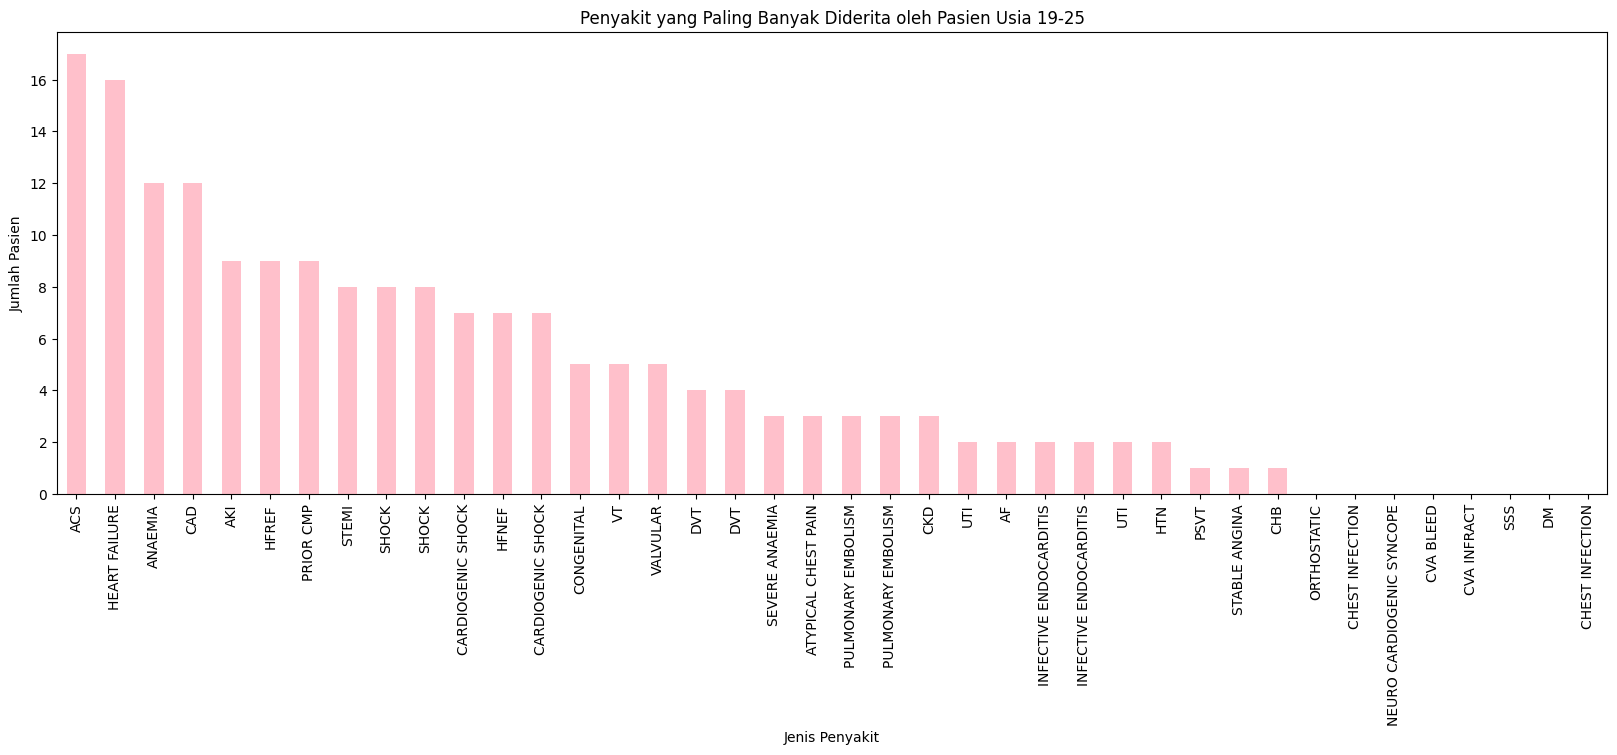

In [ ]:
import matplotlib.pyplot as plt
# mengelompokkan kolom yang tegolong penyakit
# diasumsikan semua kolom penyakit ini sudah merepresentasikan penyakit yang diderita pasien
# sehingga tidak perlu mempertimbangkan kolom lain seperti TLC, PLATELETS, GLUCODE, UREA, CREATININE, BNP, EF, dan lainnya
disease_columns = ['CHEST INFECTION', 'UTI', 'INFECTIVE ENDOCARDITIS', 'DVT',
                   'CARDIOGENIC SHOCK', 'SHOCK', 'PULMONARY EMBOLISM', 'DM',
                   'HTN', 'CAD', 'PRIOR CMP', 'CKD', 'SEVERE ANAEMIA', 'ANAEMIA',
                   'STABLE ANGINA', 'ACS', 'STEMI', 'ATYPICAL CHEST PAIN', 'HEART FAILURE',
                   'HFREF', 'HFNEF', 'VALVULAR', 'CHB', 'SSS', 'AKI', 'CVA INFRACT',
                   'CVA BLEED', 'AF', 'VT', 'PSVT', 'CONGENITAL', 'UTI', 'NEURO CARDIOGENIC SYNCOPE',
                   'ORTHOSTATIC', 'INFECTIVE ENDOCARDITIS', 'DVT', 'CARDIOGENIC SHOCK', 'SHOCK',
                   'PULMONARY EMBOLISM', 'CHEST INFECTION']

# melakukan filtering data yang memiliki age antara 19 sampai 25
filtered_data = df[(df['AGE']>=19) & (df['AGE']<=25)]

# melakukan stacking untuk semua kolom penyakit dan menghitung kemunculan angka 1 pada tiap penyakit
diseases = filtered_data[disease_columns].stack().reset_index(drop=True)
disease_counts = filtered_data[disease_columns].apply(lambda col: col.eq(1).sum())
disease_counts_sorted = disease_counts.sort_values(ascending=False)

plt.figure(figsize=(20, 6))
disease_counts_sorted.plot(kind='bar', color='pink')
plt.title('Penyakit yang Paling Banyak Diderita oleh Pasien Usia 19-25')
plt.xlabel('Jenis Penyakit')
plt.ylabel('Jumlah Pasien')
plt.show()

Dapat disimpulkan bahwa pasien pada rentang usia 19-25 paling banyak menderita penyakit :
1. ACS (Acute Coronary Syndrome)
2. Heart failure
3. Anaemia dan CAD (Coronary Artery Disease)

## 📍Perbandingan rata-rata kompilasi penyakit pasien merokok di daerah urban dengan pasien merokok di daerah rural

In [ ]:
df_ha = df.copy()
penyakit = ["DM", "HTN", "CAD", "PRIOR CMP", "SEVERE ANAEMIA", "ANAEMIA", "STABLE ANGINA", "ACS", "STEMI", "ATYPICAL CHEST PAIN", "HEART FAILURE", "HFREF", "HFNEF", "VALVULAR", "CHB", "SSS", "AKI", "CVA INFRACT", "CVA BLEED", "VT", "PSVT", "CONGENITAL", "UTI", "NEURO CARDIOGENIC SYNCOPE", "INFECTIVE ENDOCARDITIS", "DVT", "CARDIOGENIC SHOCK", "SHOCK", "PULMONARY EMBOLISM", "CHEST INFECTION"]
df_ha = df_ha[df_ha['CHEST INFECTION'] != '\\']

df_ha[penyakit] = df_ha[penyakit].apply(pd.to_numeric, errors='coerce')
df_ha['Disease_Count'] = df_ha[penyakit].sum(axis=1)
df_ha['Disease_Count']

smokers = df_ha[df_ha['SMOKING '] == 1]

In [ ]:
urban_smokers = smokers[smokers['RURAL'] == 'U']
rural_smokers = smokers[smokers['RURAL'] == 'R']

avg_urban_smokers_diseases = urban_smokers['Disease_Count'].mean()
avg_rural_smokers_diseases = rural_smokers['Disease_Count'].mean()

print(f"Average number of diseases in urban smokers: {avg_urban_smokers_diseases}")
print(f"Average number of diseases in rural smokers: {avg_rural_smokers_diseases}")

Average number of diseases in urban smokers: nan
Average number of diseases in rural smokers: nan


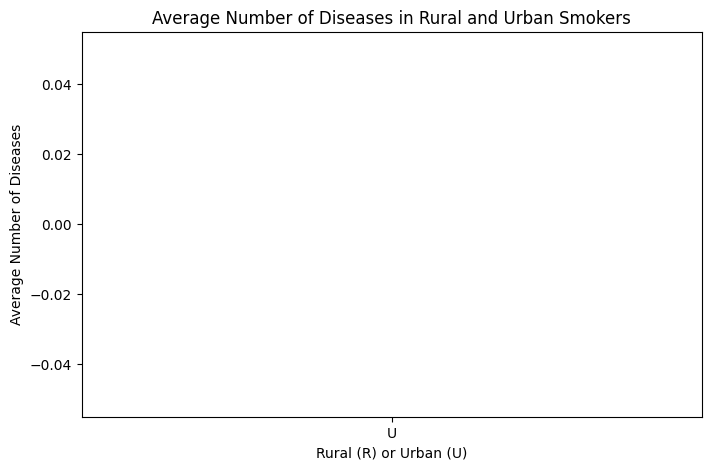

In [ ]:
avg_diseases = {'U': avg_urban_smokers_diseases, 'R': avg_rural_smokers_diseases}
categories = list(avg_diseases.keys())
averages = list(avg_diseases.values())

# Create bar plot
plt.figure(figsize=(8, 5))
plt.bar(categories, averages, color=['blue', 'green'])
plt.xlabel('Rural (R) or Urban (U)')
plt.ylabel('Average Number of Diseases')
plt.title('Average Number of Diseases in Rural and Urban Smokers')
plt.show()

## 📍Analisis hubungan antara kebiasaan merokok atau konsumsi alkohol dengan *outcome* dan penyakit yang diderita pasien?

In [ ]:
df_sa = df.copy()
df_sa = df_sa.drop_duplicates()

label_encoder = LabelEncoder()
df_sa['OUTCOME'] = label_encoder.fit_transform(df['OUTCOME'])

In [ ]:
print(df_sa['SMOKING '].value_counts())
print(df_sa['ALCOHOL'].value_counts())
print(df_sa['OUTCOME'].value_counts())

SMOKING 
0    11273
1      617
Name: count, dtype: int64
ALCOHOL
0    11075
1      815
Name: count, dtype: int64
OUTCOME
1    10461
2      759
0      670
Name: count, dtype: int64


* Mayoritas pasien tidak merokok
* Mayoritas pasian tidak minum alkohol
* Mayoritas pasien telah keluar dari rumah sakit tanpa kebutuhan medis lanjutan

OUTCOME     0     1    2
SMOKING                 
0         628  9898  747
1          42   563   12


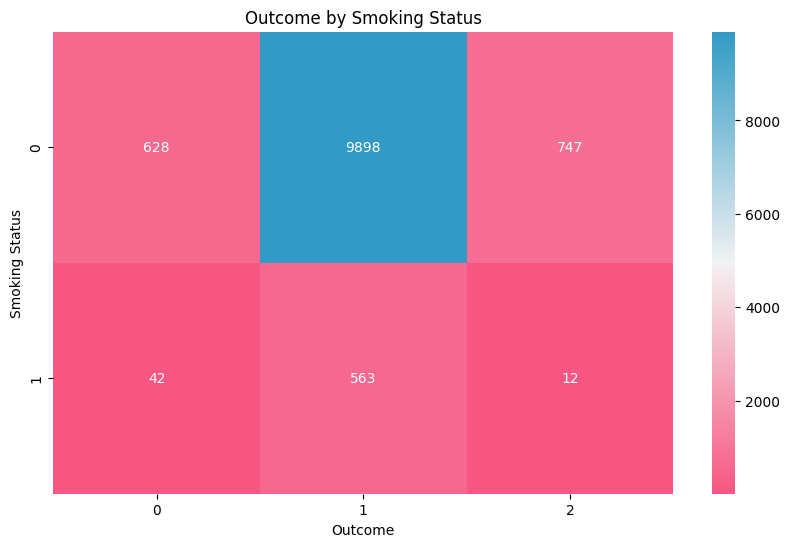

In [ ]:
cmap = sb.diverging_palette(0, 230, 90, 60, as_cmap=True)
smoking_outcome = pd.crosstab(df['SMOKING '], df['OUTCOME'])
print(smoking_outcome)

# Visualisasi tabel antara smoking dan outcome
plt.figure(figsize=(10, 6))
sns.heatmap(smoking_outcome, annot=True, fmt='d', cmap=cmap)
plt.title('Outcome by Smoking Status')
plt.xlabel('Outcome')
plt.ylabel('Smoking Status')
plt.show()

> * Pasien tidak merokok (0) memiliki jumlah yang tinggi untuk hasil *DISCHARGE* sebesar 9898. Yang berarti mayoritas pasien tidak merokok keluar dari rumah sakit tanpa pengawasan medis lanjutan
* Pasien merokok (1) terdapat lebih sedikit kasus untuk semua hasil dengan *DISCHARGE* menjadi yang paling tinggi juga sebesar 563

OUTCOME    0     1    2
ALCOHOL                
0        608  9715  752
1         62   746    7


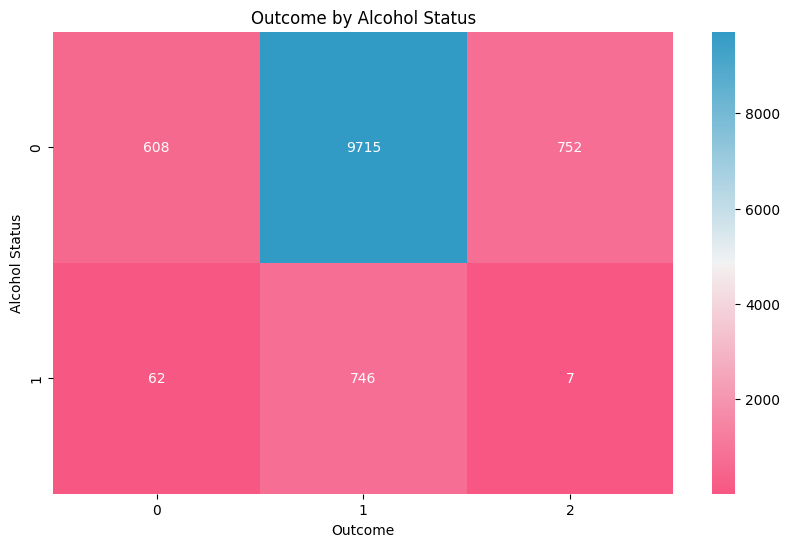

In [ ]:
alcohol_outcome = pd.crosstab(df['ALCOHOL'], df['OUTCOME'])
print(alcohol_outcome)

# Visualisasi tabel antara alcohol dan outcome
plt.figure(figsize=(10, 6))
sns.heatmap(alcohol_outcome, annot=True, fmt='d', cmap=cmap)
plt.title('Outcome by Alcohol Status')
plt.xlabel('Outcome')
plt.ylabel('Alcohol Status')
plt.show()

> Kurang lebih sama seperti grafik sebelumnya dimana pasien yang tidak mengonsumsi alkohol memiliki lebih banyak kasus untuk setiap tipe outcome, hal ini juga dapat terjadi karena adanya imbalanced data. Akan tetapi jika dilihat secara keseluruhan, outcome *DISCHARGE* menjadi yang paling umum pada pasien yang tidak mengonsumsi alkohol

<ipython-input-49-ff651d27a919>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smoking_data[col] = pd.to_numeric(smoking_data[col], errors='coerce')


CAD                          440.0
ACS                          266.0
HTN                          230.0
DM                           206.0
STEMI                        141.0
HEART FAILURE                139.0
AKI                           97.0
PRIOR CMP                     95.0
HFREF                         85.0
ANAEMIA                       71.0
STABLE ANGINA                 57.0
HFNEF                         56.0
CKD                           41.0
UTI                           38.0
UTI                           38.0
AF                            24.0
CARDIOGENIC SHOCK             23.0
CARDIOGENIC SHOCK             23.0
ATYPICAL CHEST PAIN           20.0
SHOCK                         17.0
SHOCK                         17.0
CHEST INFECTION               15.0
CHEST INFECTION               15.0
VALVULAR                      15.0
CVA INFRACT                   13.0
PULMONARY EMBOLISM            10.0
PULMONARY EMBOLISM            10.0
VT                             9.0
SEVERE ANAEMIA      

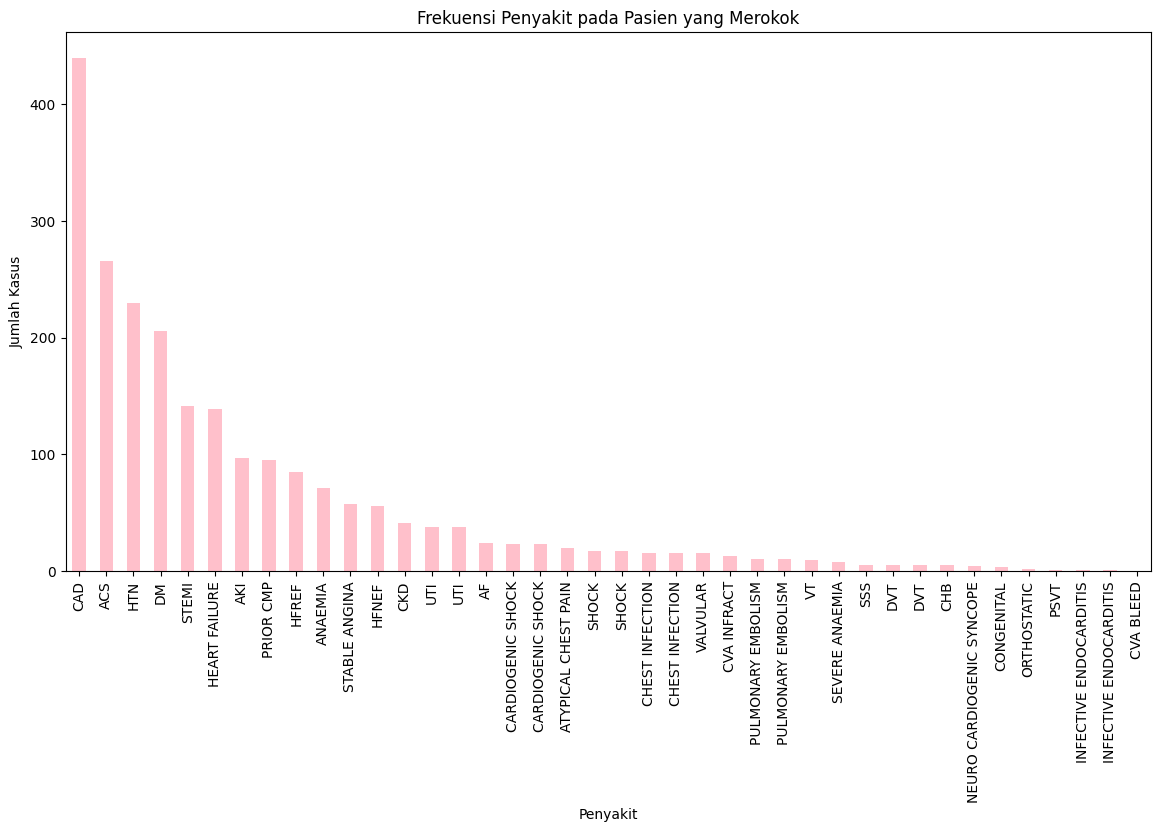

In [ ]:
disease_columns = ['CHEST INFECTION', 'UTI', 'INFECTIVE ENDOCARDITIS', 'DVT',
                   'CARDIOGENIC SHOCK', 'SHOCK', 'PULMONARY EMBOLISM', 'DM',
                   'HTN', 'CAD', 'PRIOR CMP', 'CKD', 'SEVERE ANAEMIA', 'ANAEMIA',
                   'STABLE ANGINA', 'ACS', 'STEMI', 'ATYPICAL CHEST PAIN', 'HEART FAILURE',
                   'HFREF', 'HFNEF', 'VALVULAR', 'CHB', 'SSS', 'AKI', 'CVA INFRACT',
                   'CVA BLEED', 'AF', 'VT', 'PSVT', 'CONGENITAL', 'UTI', 'NEURO CARDIOGENIC SYNCOPE',
                   'ORTHOSTATIC', 'INFECTIVE ENDOCARDITIS', 'DVT', 'CARDIOGENIC SHOCK', 'SHOCK',
                   'PULMONARY EMBOLISM', 'CHEST INFECTION']

df['SMOKING '] = pd.to_numeric(df['SMOKING '], errors='coerce')
smoking_data = df[df['SMOKING '] == 1]
for col in disease_columns:
    smoking_data[col] = pd.to_numeric(smoking_data[col], errors='coerce')

disease_freq = smoking_data[disease_columns].sum().sort_values(ascending=False)
print(disease_freq)

# Visualisasi bar plot
plt.figure(figsize=(14, 7))
disease_freq.plot(kind='bar', color='pink')
plt.title('Frekuensi Penyakit pada Pasien yang Merokok')
plt.xlabel('Penyakit')
plt.ylabel('Jumlah Kasus')
plt.xticks(rotation=90)
plt.show()

* Berdasarkan tabel frekuensi jumlah kasus setiap penyakit pada pasien yang merokok, didapatkan bahwa *CAD (Coronary Artery Disease), ACS(Acute Coronary Syndrome)* dan *HTN(Hypertension)* merupakan penyakit yang paling sering diderita oleh pasien merokok (tanpa mempertimbangkan faktor lain)
* Berdasarkan data, *Heart Failure* atau gagal jantung justru menempati peringkat ke-5 sebagai penyakit yang paling sering diderita oleh pasien merokok

<ipython-input-50-b526f5751720>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alcohol_data[col] = pd.to_numeric(alcohol_data[col], errors='coerce')


CAD                          572.0
HTN                          363.0
ACS                          337.0
DM                           307.0
HEART FAILURE                175.0
AKI                          165.0
STEMI                        157.0
PRIOR CMP                    117.0
ANAEMIA                       94.0
HFREF                         94.0
STABLE ANGINA                 85.0
HFNEF                         82.0
CKD                           63.0
AF                            51.0
UTI                           38.0
UTI                           38.0
CARDIOGENIC SHOCK             36.0
CARDIOGENIC SHOCK             36.0
VALVULAR                      27.0
ATYPICAL CHEST PAIN           25.0
CHEST INFECTION               24.0
CHEST INFECTION               24.0
CVA INFRACT                   23.0
SHOCK                         23.0
SHOCK                         23.0
VT                            21.0
DVT                           16.0
DVT                           16.0
PULMONARY EMBOLISM  

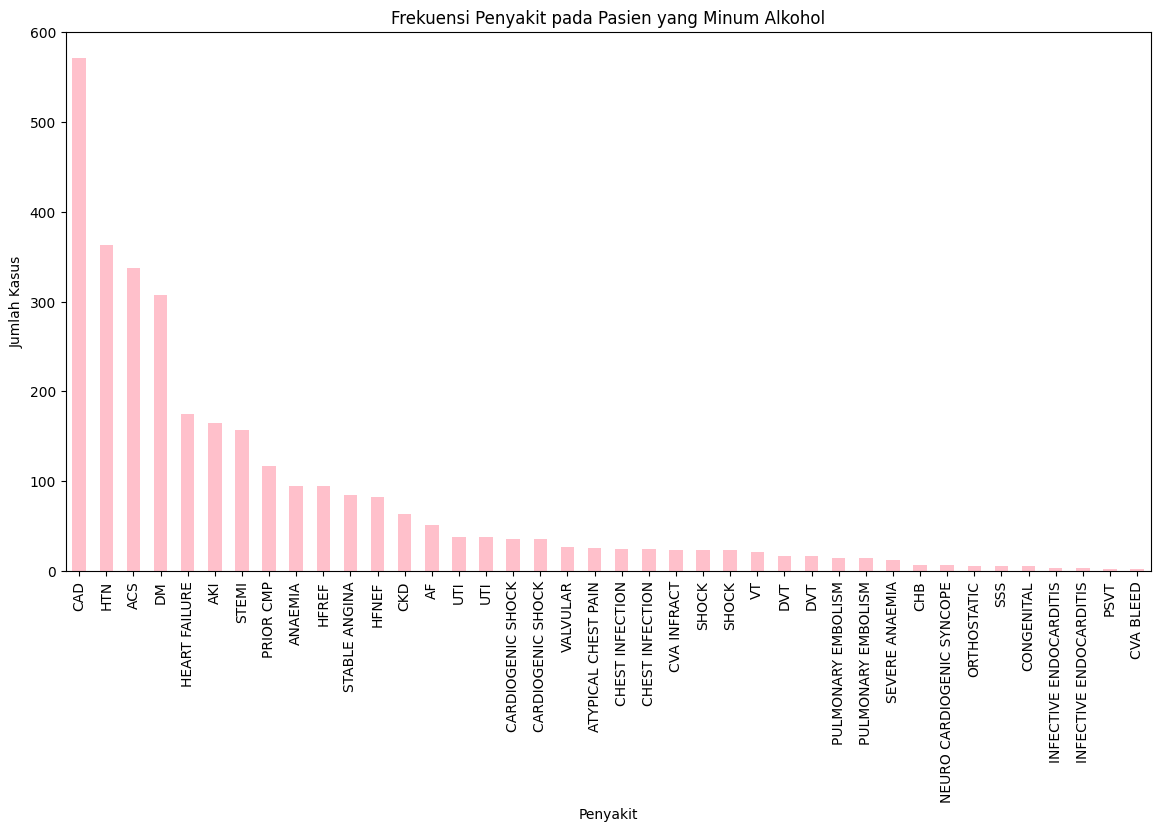

In [ ]:
df['ALCOHOL'] = pd.to_numeric(df['ALCOHOL'], errors='coerce')
alcohol_data = df[df['ALCOHOL'] == 1]
for col in disease_columns:
    alcohol_data[col] = pd.to_numeric(alcohol_data[col], errors='coerce')

disease_freq = alcohol_data[disease_columns].sum().sort_values(ascending=False)

# Menampilkan hasil
print(disease_freq)

# Visualisasi bar plot
plt.figure(figsize=(14, 7))
disease_freq.plot(kind='bar', color='pink')
plt.title('Frekuensi Penyakit pada Pasien yang Minum Alkohol')
plt.xlabel('Penyakit')
plt.ylabel('Jumlah Kasus')
plt.xticks(rotation=90)
plt.show()

* Berdasarkan tabel frekuensi jumlah kasus setiap penyakit pada pasien yang mengonsumsi alkohol, didapatkan bahwa *CAD (Coronary Artery Disease), HTN(Hypertension)*, dan *ACS(Acute Coronary Syndrome)* dan  merupakan penyakit yang paling sering diderita oleh pasien mengonsumsi alkohol (tanpa mempertimbangkan faktor lain)
* Hal ini sedikit berbeda dengan tabel pasien yang merokok sebelumnya dimana pada pasien yang mengonsumsi alkohol lebih banyak penderita HTN

## 📍Banyak pasien per bulan tiap tahunnya?

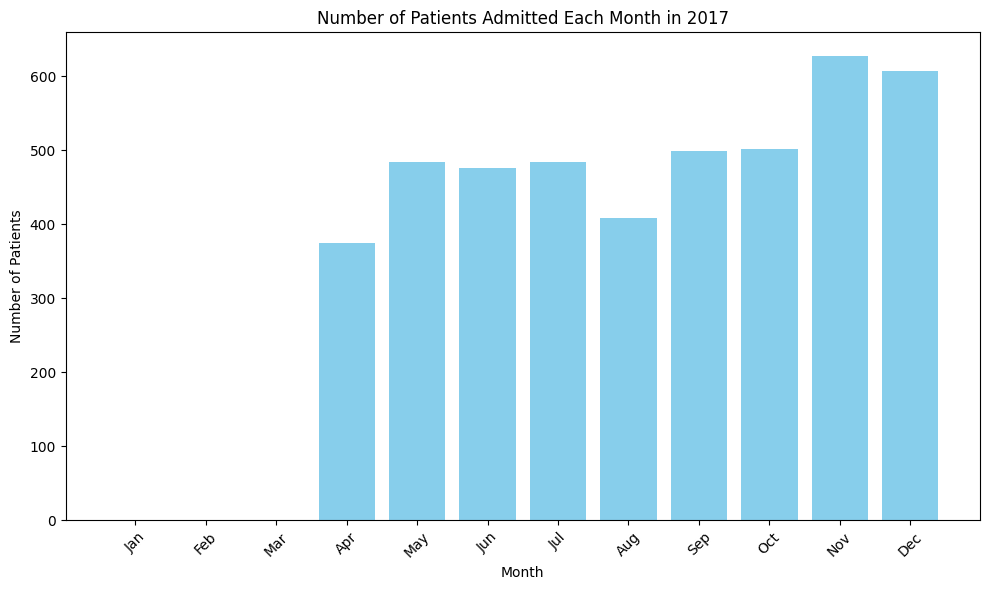

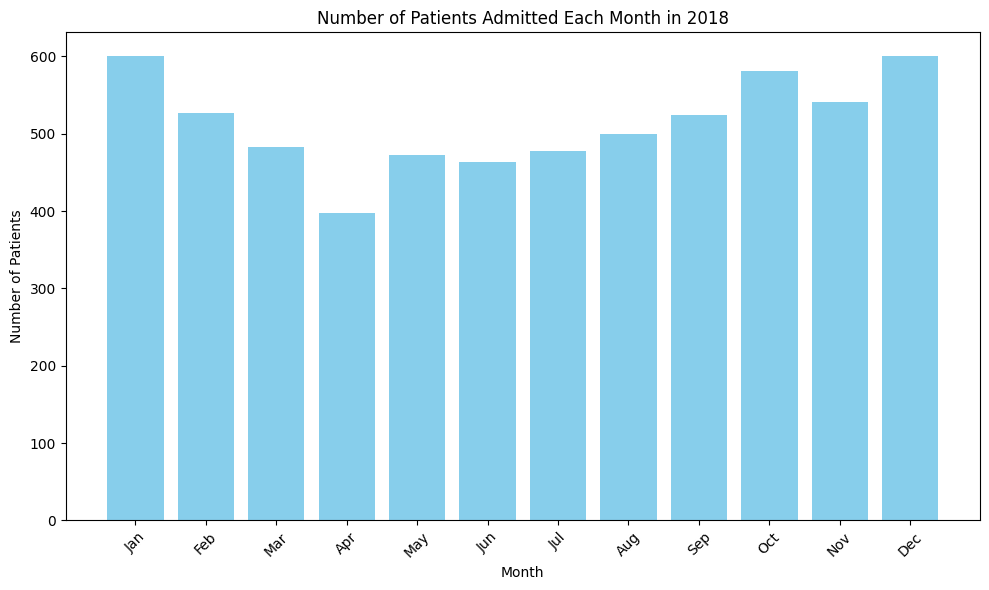

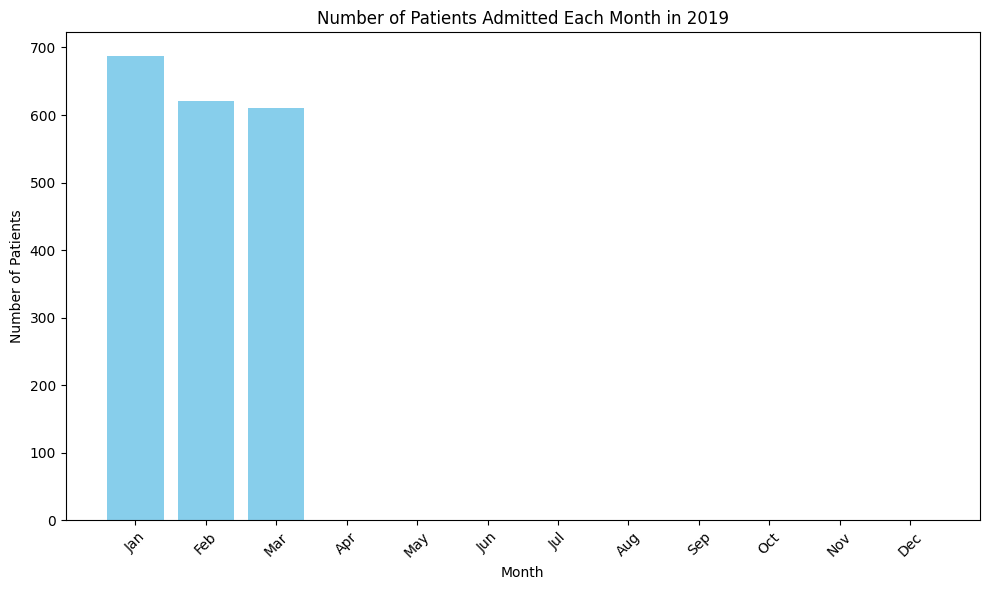

In [ ]:
dfpasien_per_tahun = pd.read_csv('admission.csv')
dfpasien_per_tahun.head()

dfpasien_per_tahun['month year'] = pd.to_datetime(dfpasien_per_tahun['month year'], format='%b-%y')

dfpasien_per_tahun['year'] = dfpasien_per_tahun['month year'].dt.year
dfpasien_per_tahun['month'] = dfpasien_per_tahun['month year'].dt.strftime('%b')

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

grouped = dfpasien_per_tahun.groupby(['year', 'month']).size().reset_index(name='patients')

all_months = pd.DataFrame({'month': month_order})
years = grouped['year'].unique()

for year in years:
    yearly_data = grouped[grouped['year'] == year]
    yearly_data = all_months.merge(yearly_data, on='month', how='left')
    yearly_data['patients'] = yearly_data['patients'].fillna(0)

    plt.figure(figsize=(10, 6))
    plt.bar(yearly_data['month'], yearly_data['patients'], color='skyblue')
    plt.title(f'Number of Patients Admitted Each Month in {year}')
    plt.xlabel('Month')
    plt.ylabel('Number of Patients')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Modelling

Dibuat 3 jenis model utama yaitu :
* Model klasifikasi --> melakukan klasifikasi terhadap `outcome` pasien
* Model regresi --> melakukan prediksi terhadap `duration of intensive unit stay` pasien
* Model clustering --> melakukan clustering terhadap dataset `Health Admission`

## 🩺 Klasifikasi *outcome* pasien

In [ ]:
X = df.drop(columns=['OUTCOME'])
y = df['OUTCOME']

mi_scores = mutual_info_classif(X, y, discrete_features='auto')
mi_scores_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
mi_scores_df = mi_scores_df.sort_values(by='MI Score', ascending=False)

top_k_features = mi_scores_df.head(30)['Feature']

X = X[top_k_features]

scaler = StandardScaler()

numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns
# Standard scale the numerical columns
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 📍Decision Tree

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11890 entries, 0 to 12549
Data columns (total 51 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   AGE                              11890 non-null  int64  
 1   GENDER                           11890 non-null  int64  
 2   RURAL                            11890 non-null  int64  
 3   TYPE OF ADMISSION-EMERGENCY/OPD  11890 non-null  int64  
 4   DURATION OF STAY                 11890 non-null  int64  
 5   duration of intensive unit stay  11890 non-null  int64  
 6   SMOKING                          11890 non-null  int64  
 7   ALCOHOL                          11890 non-null  int64  
 8   DM                               11890 non-null  int64  
 9   HTN                              11890 non-null  int64  
 10  CAD                              11890 non-null  int64  
 11  PRIOR CMP                        11890 non-null  int64  
 12  CKD                    

In [ ]:
# Fungsi untuk evaluasi performa classifier
def evaluate_classifier_performance(prediction, y_test):
    # Informasi evaluasi secara compact
    print("Hasil Evaluasi berdasarkan classification report \n\n%s\n" % (classification_report(y_test, prediction, zero_division=0)))
    print()
    print("Confusion Matrix")
    print()
    print('Accuracy Average:', accuracy_score(y_test, prediction))
    print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))
    print('Precision Macro Average:', precision_score(y_test, prediction, average='macro', zero_division=0))
    print('Precision Micro Average:', precision_score(y_test, prediction, average='micro', zero_division=0))
    print('Recall Macro Average:', recall_score(y_test, prediction, average='macro', zero_division=0))
    print('Recall Micro Average:', recall_score(y_test, prediction, average='micro', zero_division=0))
    print()

# Model Decision Tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluasi model menggunakan fungsi yang sudah dibuat
evaluate_classifier_performance(y_pred, y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.17      0.24      0.20       131
           1       0.94      0.91      0.93      2091
           2       0.61      0.59      0.60       156

    accuracy                           0.86      2378
   macro avg       0.57      0.58      0.57      2378
weighted avg       0.87      0.86      0.86      2378



Confusion Matrix

Accuracy Average: 0.8561816652649286
F1 Macro Average: 0.5737229673399886
F1 Micro Average: 0.8561816652649286
Precision Macro Average: 0.5706620662883891
Precision Micro Average: 0.8561816652649286
Recall Macro Average: 0.580419359165786
Recall Micro Average: 0.8561816652649286



### 📍Random Forest

In [ ]:
def evaluate_classifier_performance(prediction, y_test):
    # Informasi evaluasi secara compact
    print("Hasil Evaluasi berdasarkan classification report \n\n%s\n" % (classification_report(y_test, prediction,zero_division=0)))
    print()
    print("Confusion Matrix")
    print()
    y_actual = pd.Series(np.array(y_test), name = "actual")
    y_pred = pd.Series(np.array(prediction), name = "prediction")
    df_confusion = pd.crosstab(y_actual, y_pred)
    display(df_confusion)
    print()
    print()

    print("Metrik hasil evaluasi : ")
    print('Accuracy Average:', accuracy_score(y_test, prediction))
    print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))
    print('Precision Macro Average:', precision_score(y_test, prediction, average='macro',zero_division=0))
    print('Precision Micro Average:', precision_score(y_test, prediction, average='micro',zero_division=0))
    print('Recall Macro Average:', recall_score(y_test, prediction, average='macro',zero_division=0))
    print('Recall Micro Average:', recall_score(y_test, prediction, average='micro',zero_division=0))
    print()

In [ ]:
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth' : [30, 35, 40, 45, 50],
              'min_samples_split': [2, 3, 4, 5],
              }

model = RandomForestClassifier()
hyperparameter_rfc = GridSearchCV(estimator= model,
                   param_grid=param_grid, cv = 5)
hyperparameter_rfc.fit(X_train, y_train)
print(hyperparameter_rfc.best_params_)

model = RandomForestClassifier(**hyperparameter_rfc.best_params_)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
evaluate_classifier_performance(y_pred, y_test)

{'criterion': 'entropy', 'max_depth': 40, 'min_samples_split': 3}
Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.50      0.05      0.08       131
           1       0.92      0.99      0.96      2091
           2       0.86      0.62      0.72       156

    accuracy                           0.92      2378
   macro avg       0.76      0.55      0.59      2378
weighted avg       0.90      0.92      0.89      2378



Confusion Matrix



prediction,0,1,2
actual,,,
0,6,117,8
1,4,2080,7
2,2,58,96




Metrik hasil evaluasi : 
Accuracy Average: 0.9175777964676198
F1 Macro Average: 0.5867397441206755
F1 Micro Average: 0.9175777964676198
Precision Macro Average: 0.7624198477857015
Precision Micro Average: 0.9175777964676198
Recall Macro Average: 0.5519751670868234
Recall Micro Average: 0.9175777964676198



### 📍MLPClassifier

In [ ]:
mlp = MLPClassifier(
    hidden_layer_sizes=(100,),
    activation='relu',
    solver='adam',
    alpha=1e-5,
    learning_rate='constant',
    random_state=42
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['f1_micro', 'f1_macro', 'precision_micro', 'precision_macro', 'recall_micro', 'recall_macro']

for score_type in scoring:
    score = cross_val_score(mlp, X_train, y_train, scoring=score_type, cv=cv, n_jobs=-1)
    print(f"{score_type} score: {np.mean(score)}")

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)
evaluate_classifier_performance(y_pred, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


f1_micro score: 0.2867941647285569


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


f1_macro score: 0.0974419142202116


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


precision_micro score: 0.2867941647285569


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


precision_macro score: 0.09762746955920157


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


recall_micro score: 0.2867941647285569


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


recall_macro score: 0.09941603224136089
Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.58      0.66      0.62       414
           1       0.34      0.18      0.23       217
           2       0.30      0.35      0.32       386
           3       0.19      0.17      0.18       296
           4       0.19      0.16      0.18       269
           5       0.26      0.34      0.30       239
           6       0.19      0.16      0.17       134
           7       0.12      0.10      0.11       109
           8       0.14      0.14      0.14        79
           9       0.13      0.14      0.13        58
          10       0.07      0.07      0.07        42
          11       0.07      0.12      0.09        25
          12       0.17      0.24      0.20        25
          13       0.00      0.00      0.00        11
          14       0.00      0.00      0.00        13
          15       0.08      0.09      0.09 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### 📍XGBoost Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}
xgb_model = xgb.XGBClassifier()
f1_scorer = make_scorer(f1_score, average='weighted')

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, n_jobs=-1, scoring=f1_scorer)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring=make_scorer(f1_score, average=weighted))

In [ ]:
y_pred = grid_search.predict(X_test)

evaluate_classifier_performance(y_pred, y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.50      0.19      0.28       131
           1       0.94      0.99      0.96      2091
           2       0.88      0.76      0.82       156

    accuracy                           0.93      2378
   macro avg       0.77      0.65      0.69      2378
weighted avg       0.91      0.93      0.92      2378



Confusion Matrix



prediction,0,1,2
actual,,,
0,25,99,7
1,17,2065,9
2,8,29,119




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
Accuracy Average: 0.9289318755256518
F1 Macro Average: 0.6860549324373038
F1 Micro Average: 0.9289318755256518
Precision Macro Average: 0.774371316140582
Precision Micro Average: 0.9289318755256518
Recall Macro Average: 0.6470753218291742
Recall Micro Average: 0.9289318755256518



## 🩺 Prediksi *duration of intensive unit stay* pasien

In [ ]:
# Memisahkan fitur dan target
X = df.drop(columns=['duration of intensive unit stay'])
y = df['duration of intensive unit stay']

# Standard scale the numerical columns
scaler = StandardScaler()
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

# Split data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 📍Linear Rigression

In [ ]:
# Model Linear Regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

# Evaluasi model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")

Mean Absolute Error (MAE): 1.592741622019931
Mean Squared Error (MSE): 5.861180187730467
Root Mean Squared Error (RMSE): 2.4209874406387297
R-squared: 0.6790805846375425


In [ ]:
# KFold cross-validation dengan 5 fold
kf_5 = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results_5 = cross_val_score(regressor, X, y, cv=kf_5, scoring='neg_mean_squared_error')
rmse_5 = np.sqrt(-cv_results_5)
print(f'5-Fold Cross-Validation RMSE: {rmse_5.mean()} ± {rmse_5.std()}')

5-Fold Cross-Validation RMSE: 1.2403929165206238e-14 ± 3.143228924200302e-15


In [ ]:
# KFold cross-validation dengan 10 fold
kf_10 = KFold(n_splits=10, shuffle=True, random_state=42)
cv_results_10 = cross_val_score(regressor, X, y, cv=kf_10, scoring='neg_mean_squared_error')
rmse_10 = np.sqrt(-cv_results_10)
print(f'10-Fold Cross-Validation RMSE: {rmse_10.mean()} ± {rmse_10.std()}')

10-Fold Cross-Validation RMSE: 9.056250281156449e-15 ± 1.9972497651196827e-15


In [ ]:
# KFold cross-validation dengan 20 fold
kf_20 = KFold(n_splits=20, shuffle=True, random_state=42)
cv_results_20 = cross_val_score(regressor, X, y, cv=kf_20, scoring='neg_mean_squared_error')
rmse_20 = np.sqrt(-cv_results_20)
print(f'20-Fold Cross-Validation RMSE: {rmse_20.mean()} ± {rmse_20.std()}')

20-Fold Cross-Validation RMSE: 1.132810782716562e-14 ± 2.6886470100720346e-15


### 📍Lasso Regression

In [ ]:
scaler = StandardScaler()
X_train_scaled_lasso, X_test_scaled_lasso = scaler.fit_transform(X_train), scaler.transform(X_test)

In [ ]:
lasso_reg = Lasso(max_iter=3000)

param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'max_iter': [1000, 2000, 3000]
}

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
grid_search = GridSearchCV(estimator=lasso_reg, param_grid=param_grid, cv=kfold, scoring='r2')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Lasso(max_iter=3000),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [1000, 2000, 3000]},
             scoring='r2')

In [ ]:
# Menampilkan hasil terbaik
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_}')

Best parameters: {'alpha': 0.01, 'max_iter': 1000}
Best score: 0.18248077618313396


In [ ]:
lasso_reg = Lasso(**grid_search.best_params_)
lasso_reg.fit(X_train_scaled_lasso, y_train)

Lasso(alpha=0.01)

In [ ]:
def regression_metrics(scores):
    mae_mean = np.mean(scores['test_mae'])
    mse_mean = np.mean(scores['test_mse'])
    rmse_mean = np.mean(scores['test_rmse'])
    r2_mean = np.mean(scores['test_r2'])

    print('MAE\t:', mae_mean)
    print('MSE\t:', mse_mean)
    print('RMSE\t:', rmse_mean)
    print('R2\t:', r2_mean)

In [ ]:
scoring = {
    'mae': make_scorer(mean_absolute_error),
    'mse': make_scorer(mean_squared_error),
    'rmse': make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred))),
    'r2': make_scorer(r2_score)
}

In [ ]:
from sklearn.model_selection import cross_validate

scores = cross_validate(lasso_reg, X_train_scaled_lasso, y_train, cv=kfold, scoring=scoring)
regression_metrics(scores)

MAE	: 0.14116908669151737
MSE	: 0.09812701015474766
RMSE	: 0.31305208946583496
R2	: 0.18248159678585701


### 📍Ridge Regression

In [ ]:
def regression_metrics_ridge(prediction, y_test):
    MAE = mean_absolute_error(y_test, prediction)
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    R_squared = r2_score(y_test, prediction)

    print('MAE: ' + str(MAE))
    print('MSE: ' + str(MSE))
    print('RMSE: ' + str(RMSE))
    print('R_squared: ' + str(R_squared))

In [ ]:
alpha_ridge_values = [0.001, 0.01, 0.1, 1, 10]
ridge_models = []
for alpha in alpha_ridge_values:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    ridge_models.append(ridge)

In [ ]:
for ridge_model in ridge_models:
    y_val_pred = ridge_model.predict(X_test)
    alpha = ridge_model.alpha  # Extract the alpha value
    print(f"Ridge model for alpha = {alpha}")
    regression_metrics_ridge(y_val_pred, y_test)
    print("\n")

Ridge model for alpha = 0.001
MAE: 1.5927416195364934
MSE: 5.861180261229278
RMSE: 2.4209874558182407
R_squared: 0.6790805806132343


Ridge model for alpha = 0.01
MAE: 1.5927415971920516
MSE: 5.861180922732952
RMSE: 2.420987592436804
R_squared: 0.6790805443936735


Ridge model for alpha = 0.1
MAE: 1.592741374388013
MSE: 5.861187539191619
RMSE: 2.420988958915678
R_squared: 0.6790801821202099


Ridge model for alpha = 1
MAE: 1.5927392080468241
MSE: 5.861253844207722
RMSE: 2.42100265266433
R_squared: 0.6790765516965884


Ridge model for alpha = 10
MAE: 1.592723643887289
MSE: 5.86192980958231
RMSE: 2.421142253066166
R_squared: 0.6790395403088014




In [ ]:
def regression_metrics(prediction, y_test):
    MAE = mean_absolute_error(y_test, prediction)
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    R_squared = r2_score(y_test, prediction)

    print('MAE: ' + str(MAE))
    print('MSE: ' + str(MSE))
    print('RMSE: ' + str(RMSE))
    print('R_squared: ' + str(R_squared))

alpha_ridge_values = [0.001, 0.01, 0.1, 1, 10]
ridge_models = []
for alpha in alpha_ridge_values:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    ridge_models.append(ridge)

for ridge_model in ridge_models:
    y_val_pred = ridge_model.predict(X_val_top_features)
    alpha = ridge_model.alpha  # Extract the alpha value
    print(f"Ridge model for alpha = {alpha}")
    regression_metrics(y_val_pred, y_val)
    print("\n")

### 📍Decision Tree Regression

In [ ]:
param_grid = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
               'min_samples_split': [7, 10, 15, 30],
               'max_depth' : [3, 5, 9, 12, None]}

dt = DecisionTreeRegressor()
clf = GridSearchCV(estimator= dt,
                   param_grid=param_grid, cv= 5)

clf.fit(X_train, y_train)
clf.best_params_

dtr_perform = DecisionTreeRegressor(**clf.best_params_)
dtr_perform.fit(X_train, y_train)
intensive_stay_pred = dtr_perform.predict(X_test)

In [ ]:
regression_metrics(intensive_stay_pred, y_test)

MAE: 1.631729211695966
MSE: 6.628861952314601
RMSE: 2.5746576378840356
R_squared: 0.6370474146642857


### 📍Random Forest Regression

In [ ]:
def regression_metrics(prediction, y_test):
    MAE = mean_absolute_error(y_test, prediction)
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    R_squared = r2_score(y_test, prediction)

    print('MAE: ' + str(MAE))
    print('MSE: ' + str(MSE))
    print('RMSE: ' + str(RMSE))
    print('R_squared: ' + str(R_squared))

In [ ]:
n_estimators_list = [1, 10, 100, 1000, 10000]
results = []

for n in n_estimators_list:
    rf_model = RandomForestRegressor(n_estimators=n, random_state=42)
    rf_model.fit(X_train, y_train)
    y_val_pred_rf = rf_model.predict(X_test)
    print(f"Random Forest Regression Model with n_estimators={n}")
    regression_metrics(y_val_pred_rf, y_test)
    print("\n")
    y_test_pred_rf = rf_model.predict(X_test)
    results.append({
        'n_estimators': n,
        'mse': mean_squared_error(y_test, y_val_pred_rf),
        'mae': mean_absolute_error(y_test, y_val_pred_rf),
        'r2_score': r2_score(y_test, y_val_pred_rf),
        'y_test_pred_rf': y_test_pred_rf
    })

Random Forest Regression Model with n_estimators=1
MAE: 2.0787426408746845
MSE: 11.104946383515559
RMSE: 3.3324084958953577
R_squared: 0.39196667106574634


Random Forest Regression Model with n_estimators=10
MAE: 1.6065019624334174
MSE: 6.70429995444351
RMSE: 2.5892662965487947
R_squared: 0.6329169292050603


Random Forest Regression Model with n_estimators=100
MAE: 1.544560064479955
MSE: 6.129694481625549
RMSE: 2.4758219810046014
R_squared: 0.6643785199588861


Random Forest Regression Model with n_estimators=1000
MAE: 1.5418391094957749
MSE: 6.12495464034991
RMSE: 2.474864570102758
R_squared: 0.6646380422807341


Random Forest Regression Model with n_estimators=10000
MAE: 1.5427524780394357
MSE: 6.128797805794067
RMSE: 2.4756408878902585
R_squared: 0.6644276159897864




## 🩺 Clustering

### 📍K-Means Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

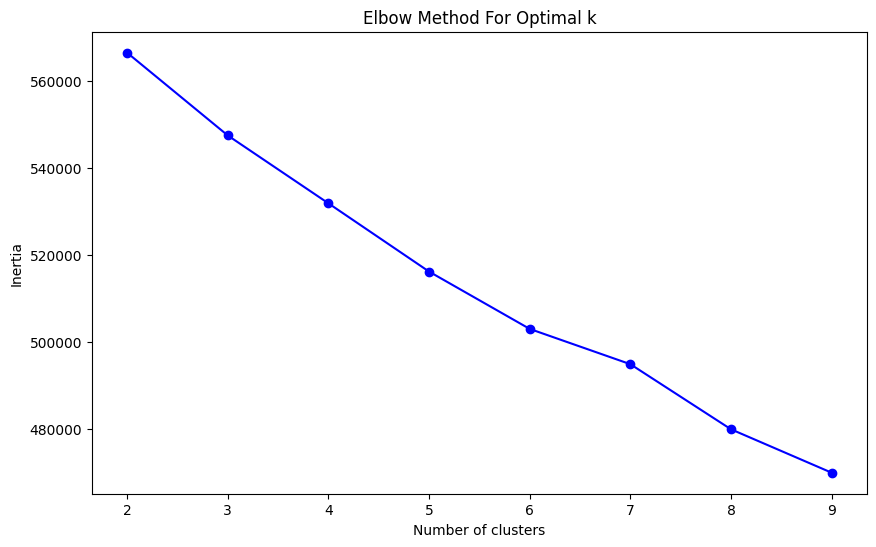

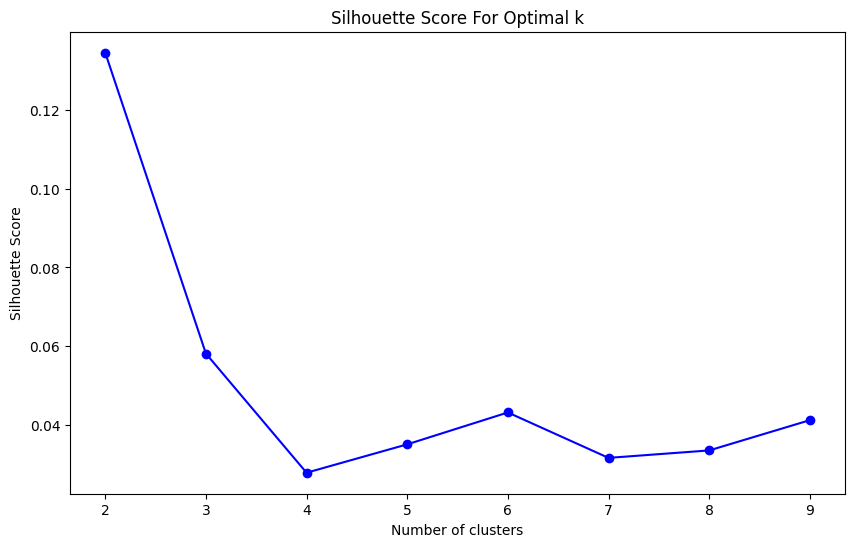

Optimal number of clusters based on Silhouette Score: 2
Silhouette Score for optimal k: 0.13463826486107286


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k=3: 0.05809552726483362


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


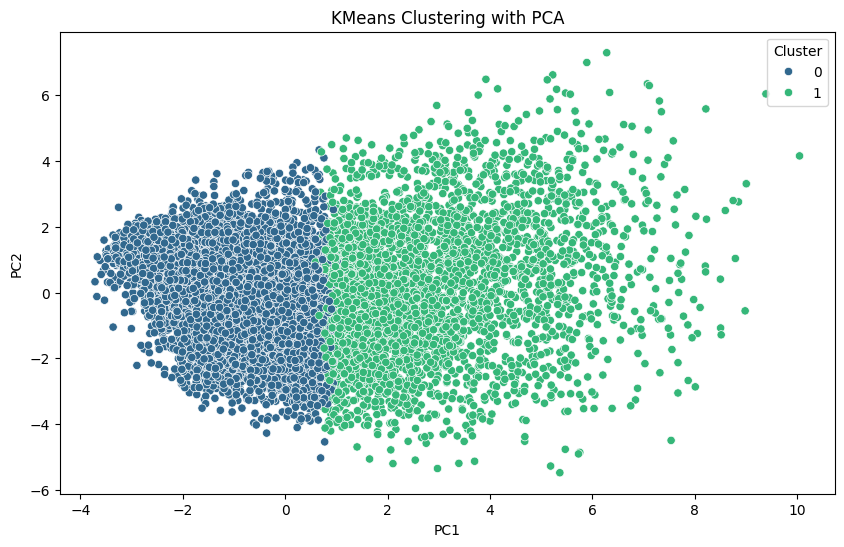

In [ ]:
from sklearn.decomposition import PCA

# Standarisasi data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

# Elbow Method dan Silhouette Score untuk menentukan jumlah cluster optimal
inertia = []
silhouette_scores = []
K = range(2, 10)  # Rentang k yang lebih luas
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_scores.append(score)

# Plot hasil Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# Plot hasil Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k')
plt.show()

# Menentukan jumlah cluster berdasarkan Silhouette Score
optimal_k = K[silhouette_scores.index(max(silhouette_scores))]
print(f'Optimal number of clusters based on Silhouette Score: {optimal_k}')
print(f'Silhouette Score for optimal k: {max(silhouette_scores)}')

# Memeriksa Silhouette Score untuk k=3
kmeans_3 = KMeans(n_clusters=3, random_state=42)
clusters_3 = kmeans_3.fit_predict(scaled_features)
silhouette_score_3 = silhouette_score(scaled_features, clusters_3)
print(f'Silhouette Score for k=3: {silhouette_score_3}')

# Melakukan clustering dengan jumlah cluster yang dipilih berdasarkan Silhouette Score
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Menambahkan hasil clustering ke dataframe asli
df['Cluster'] = clusters

# Visualisasi hasil clustering menggunakan PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['Cluster'] = clusters

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='viridis')
plt.title('KMeans Clustering with PCA')
plt.show()

### 📍Hierarchical Clustering

In [ ]:
# Melakukan clustering dengan jumlah cluster yang dipilih berdasarkan Silhouette Score
clustering = AgglomerativeClustering(n_clusters=optimal_k)
clusters = clustering.fit_predict(scaled_features)

# Menambahkan hasil clustering ke dataframe asli
df['Agg_Cluster'] = clusters

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    linkage_matrix = linkage(model.children_, method='ward')

    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    dendrogram(linkage_matrix, **kwargs)

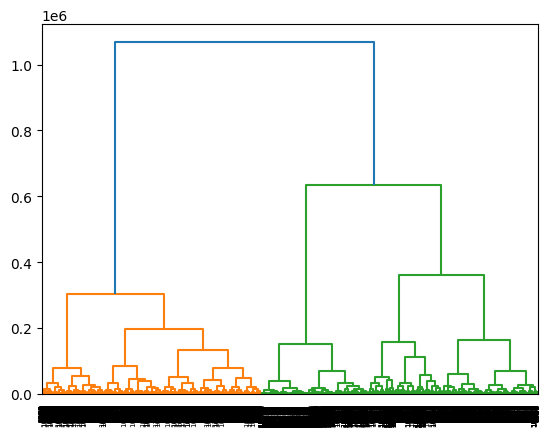

In [ ]:
plot_dendrogram(clustering)

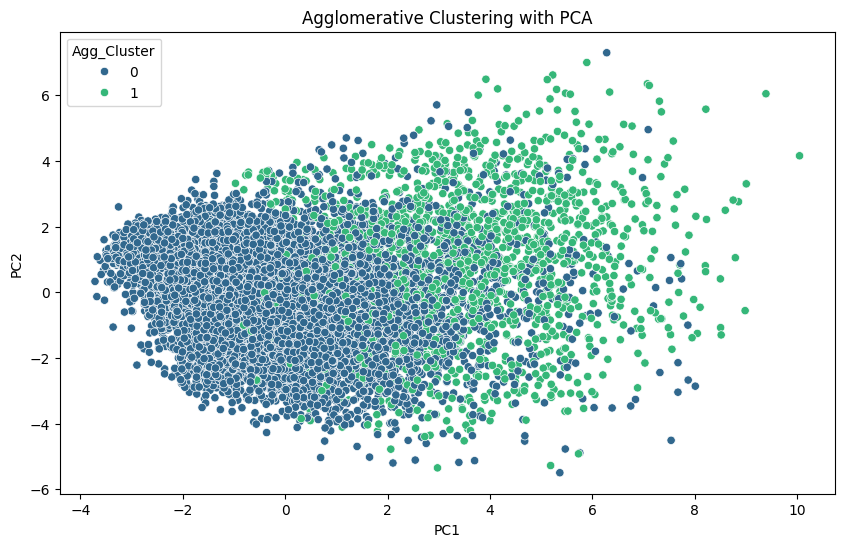

In [ ]:
# Visualisasi hasil clustering menggunakan PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
df_pca_agg = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca_agg['Agg_Cluster'] = clusters

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca_agg, x='PC1', y='PC2', hue='Agg_Cluster', palette='viridis')
plt.title('Agglomerative Clustering with PCA')
plt.show()